# EDA of Conventional and Renewable Power Plants in Germany

Project Overview

The goal of the EDA (Exploratory Data Analysis) is to gain a comprehensive overview of the various energy sources used by conventional and renewable power plants in Germany. This includes analyzing installed capacity, the number of power plants, and their geographical distribution at the federal state level. In addition, regional and temporal trends are examined to determine whether certain energy sources or types of power plants are more common in specific regions and how installed capacity has developed over the years.

A particular focus is placed on comparing conventional and renewable power plants — both in terms of the number of facilities and installed capacity, as well as their regional distribution. The analysis aims to reveal developments and patterns in the German energy sector.

For the Exploratory Data Analysis (EDA), data on both conventional and renewable power plants in Germany is used:

    Conventional power plants: https://data.open-power-system-data.org/conventional_power_plants/2020-10-01

    Renewable power plants: https://data.open-power-system-data.org/renewable_power_plants/2020-08-25


In [1]:
#Load required libraries

import pandas as pd
import numpy as np
from skimpy import skim
from summarytools import dfSummary
import plotly.io as pio 
from IPython.display import Image, display
import tempfile
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1. Conventional Power Plants in Germany 

In [2]:
#Load and preview csv-file containing data about conventional power plants in Germany

df_conv_power = pd.read_csv('/home/lazor/Documents/github/Python/EDA_German_Power_Plants/Data/Data_Conventional_Power_Plants_Germany.csv')
df_conv_power.head()

,id,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country,...,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
0,BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),Überlandwerk Leinetal GmbH,NaN,NaN
1,BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),LEW Verteilnetz GmbH,NaN,NaN
2,BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,USp. Mittel- / Niederspannung (MS/NS),Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
3,BNA0055,UTB,NaN,NaN,Pfleiderer Baruth GmbH,An der Birkenpfuhlheide 3,15837,Baruth/Mark,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,UTB/Eon-edis,Mittelspannung (MS),E.DIS AG,NaN,NaN
4,BNA0062,BHW Beeskow,NaN,NaN,Sonae Arauco Beeskow GmbH,NaN,15848,Beeskow,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,Umspannwerk Beeskow der E.DIS AG,Hochspannung (HS),E.DIS AG,NaN,NaN


## 1.1 Data Inspection: Conventional Power Plants

In [3]:
#Inspect the dataframe using skim()
skim(df_conv_power)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 909    │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 38     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                         ┃ NA                        ┃ NA %                          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ comment                                        │                       909 │                           100 │  │
│ └────────────────────────────────────────────────┴───────────────────────────┴───────────────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %          ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ capacity_net_b │  21 │ 2.31023102310 │  135.3 │  225.1 │     0 │     17 │   40.2 │    129 │  1410 │   █▁   │  │
│ │ netza          │     │           231 │        │        │       │        │        │        │       │        │  │
│ │ capacity_gross │ 648 │ 71.2871287128 │  310.4 │  308.7 │ 11.76 │  100.4 │    175 │    425 │  1485 │  █▃▁▁  │  │
│ │ _uba           │     │           713 │        │        │       │        │        │        │       │        │  │
│ │ commissioned   │  27 │ 2.97029702970 │   1985 │  22.41 │  1905 │   1970 │   1988 │   2003 │  2019 │  ▁▂▇██ │  │
│ │                │     │         29703 │        │        │       │        │        │        │       │        │  │
│ │ retrofit       │ 849 │ 93.3993399339 │   2003 │  12.97 │  1948 │   1996 │   2005 │   2010 │  2020 │ ▁  ▃▆█ │  │
│ │                │     │           934 │        │        │       │        │        │        │       │        │  │
│ │ shutdown       │ 799 │ 87.8987898789 │   2015 │  2.496 │  2011 │   2013 │   2015 │   2017 │  2019 │ █▃▃█▄█ │  │
│ │                │     │           879 │        │        │       │        │        │        │       │        │  │
│ │ lat            │   0 │             0 │  50.63 │  1.754 │ 46.81 │  49.18 │  50.98 │  51.68 │ 54.85 │ ▂▅▄█▃▁ │  │
│ │ lon            │   0 │             0 │  9.627 │  2.316 │ 6.178 │  7.459 │  9.349 │  11.58 │ 14.64 │ █▆▆▅▄▃ │  │
│ │ efficiency_dat │ 774 │ 85.1485148514 │ 0.4404 │ 0.1179 │  0.23 │  0.365 │   0.41 │ 0.4785 │   0.8 │ ▁█▃▂ ▁ │  │
│ │ a              │     │          8515 │        │        │       │        │        │        │       │        │  │
│ │ efficiency_est │  83 │ 9.13091309130 │ 0.4646 │ 0.1662 │  0.18 │ 0.3525 │ 0.3861 │   0.54 │   0.8 │  █▃▁ ▃ │  │
│ │ imate          │     │           913 │        │        │       │        │        │        │       │        │  │
│ └────────────────┴─────┴───────────────┴────────┴─────

In [4]:
# Inspect the dataframe using summarytools
dfSummary(df_conv_power)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[object],1. BNA0085b2. BNA00833. BNA10864. BNA10875. BNA10886. BNA10897. BNA10948. BNA11039. BNA110410. BNA110511. other,2 (0.2%)2 (0.2%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)897 (98.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
2,name_bnetza[object],1. Frimmersdorf2. PSW Vianden3. Gersteinwerk4. Niederaußem5. Hohenwarte 26. Weisweiler7. Thyrow8. Heizkraftwerk9. Markersbach10. Heizkraftwerk FL11. other,13 (1.4%)11 (1.2%)9 (1.0%)9 (1.0%)8 (0.9%)8 (0.9%)8 (0.9%)7 (0.8%)6 (0.7%)6 (0.7%)824 (90.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADvElEQVR4nO3cQU4jVxhG0d+W1QmTsixLLIMFsAgWm0V4AewDIWoQOkzIoOl548jXCn3OHKkGV8926X1s3t/fBwrbaz8Avw+xkREbGbGRERsZsZERGxmxkREbmc3M3MzMt5l5e39/f73y8/CF7Y7H48OyLId1XZ83m81fguNStsuyHO7u7mZZlsP8OOHgIrYzMzc3N/9c+0H4+vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtuZmdfX1z+u/SB8fdt1XZ8fHx9nXdfnmXm79gPxddkgkNn4l1lUnGxkrKvIWFeRsa4i46UuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQsbJRsbghYzBCxmDFzJe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9k/EAg42OUjHUVGesqMtZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxr4WSsq8j8PNnGqcal7Y7H48PMjLELl7ZdluVg7ELBezYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjK7j6HLjLELF+ZaOBmDFzJONjIGL2QMXsh49UFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuNkI2NdRca6ioxXH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYyTjYzBCxmDFzJefZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzK+s5HxMUrGuoqMdRUZ39nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5FxLZyMdRUZJxsZgxcyBi9kvPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGtXAyBi9kfp5sroTzGW/nfBLujsfjw8cGAX7Juq7P5wykdsuyHO7v71/3+/33Sz0cX8fLy8ufp9Pp8PT09G1mPhfbzMx+v/9+e3v790Wejq/o5pw/8p6NjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG7mx7WRaz8I/w//pZXduq7Pp9PpMGdeG+H38zGS+vRAyrVwznHWtXCDFzJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkX0+5TM9uAg+YAAAAASUVORK5CYII="">",0(0.0%)
3,block_bnetza[object],1. nan2. 13. B4. GuD5. 26. A7. C8. D9. Block 310. Block 211. other,225 (24.8%)16 (1.8%)13 (1.4%)11 (1.2%)11 (1.2%)9 (1.0%)9 (1.0%)9 (1.0%)8 (0.9%)8 (0.9%)590 (64.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEM0lEQVR4nO3dQU4bWQBF0Y9lpcOkLMsSy8gCvAgW24vwArIPhKhBTGdCDwKIjnqIb7mrz5ll9iWuyrj0X7h5eXkZUNgsfQD+P8RGRmxkxEZGbGTERkZsZMRGRmxkbsYYt2OML0sf5F/8

The dataset df_conv_power has 909 rows and 38 columns, with both categorical (names, locations, energy sources, technical specifications) and numerical data (capacity, coordinates, years (commissioned, retrofit, shutdown)). Some columns, like retrofit, shutdown, and efficiency_data, have a lot of missing values (over 85%), meaning this information was only recorded for a few power plants. However, key details such as IDs, names, and locations are complete, so the data can still be used for general analysis.

In [5]:
#Overview over basic statistics, columns and datatypes
df_conv_power.describe()
df_conv_power.columns
df_conv_power.dtypes

id                        object
name_bnetza               object
block_bnetza              object
name_uba                  object
company                   object
street                    object
postcode                  object
city                      object
state                     object
country                   object
capacity_net_bnetza      float64
capacity_gross_uba       float64
energy_source             object
technology                object
chp                       object
chp_capacity_uba          object
commissioned             float64
commissioned_original     object
retrofit                 float64
shutdown                 float64
status                    object
type                      object
lat                      float64
lon                      float64
eic_code_plant            object
eic_code_block            object
efficiency_data          float64
efficiency_source         object
efficiency_estimate      float64
energy_source_level_1     object
energy_sou

## 1.2 Data Cleansing: Conventional Power Plants

#### Inspection and Cleansing of Column 'country'

Before proceeding with the analysis, the dataset of conventional power plants is inspected and cleaned. The goal is to ensure that only relevant and valid entries remain, that is power plants located in Germany and classified as conventional. The cleansing process also focuses on improving data consistency in the columns describing energy sources.

In [6]:
# Overview over column 'country'
df_conv_power['country'].unique()
#Remove entries containing entries from Austria (AU), Switzerland (CH) and Luxemburg (LU)
df_conv_power = df_conv_power[df_conv_power['country'] == 'DE']
# Check whether df_conv_power_de contains entries from Germany only
df_conv_power['country'].unique()
df_conv_power['state'].unique()

array(['Niedersachsen', 'Bayern', 'Sachsen-Anhalt', 'Brandenburg',
       'Nordrhein-Westfalen', 'Berlin', 'Thüringen', 'Baden-Württemberg',
       'Hessen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Saarland',
       'Bremen', 'Schleswig-Holstein', 'Rheinland-Pfalz', 'Sachsen'],
      dtype=object)

In [7]:
# Replace German names of federal states with their English equivalents
# Create a mapping dictionary
state_mapping = {
    'Baden-Württemberg': 'Baden-Wuerttemberg',
    'Bayern': 'Bavaria',
    'Berlin': 'Berlin',
    'Brandenburg': 'Brandenburg',
    'Bremen': 'Bremen',
    'Hamburg': 'Hamburg',
    'Hessen': 'Hesse',
    'Mecklenburg-Vorpommern': 'Mecklenburg-Western Pomerania',
    'Niedersachsen': 'Lower Saxony',
    'Nordrhein-Westfalen': 'North Rhine-Westphalia',
    'Rheinland-Pfalz': 'Rhineland-Palatinate',
    'Saarland': 'Saarland',
    'Sachsen': 'Saxony',
    'Sachsen-Anhalt': 'Saxony-Anhalt',
    'Schleswig-Holstein': 'Schleswig-Holstein',
    'Thüringen': 'Thuringia'
}

# Apply mapping to column 'state'
df_conv_power['state'] = df_conv_power['state'].map(state_mapping)

# Check whether mapping was successful
df_conv_power['state'].unique()

array(['Lower Saxony', 'Bavaria', 'Saxony-Anhalt', 'Brandenburg',
       'North Rhine-Westphalia', 'Berlin', 'Thuringia',
       'Baden-Wuerttemberg', 'Hesse', 'Hamburg',
       'Mecklenburg-Western Pomerania', 'Saarland', 'Bremen',
       'Schleswig-Holstein', 'Rhineland-Palatinate', 'Saxony'],
      dtype=object)

In [8]:
# Drop several columns which are not relevant for this analysis
df_conv_power = df_conv_power.drop(['id', 'name_uba','street', 'postcode', 'lat', 'lon', 'eic_code_plant', 'eic_code_block', 'network_node','merge_comment', 'comment', 'city', 'company', 'eeg', 'network_operator', 'type', 'voltage'], axis = 1)
df_conv_power.head()

,name_bnetza,block_bnetza,state,country,capacity_net_bnetza,capacity_gross_uba,energy_source,technology,chp,chp_capacity_uba,...,commissioned_original,retrofit,shutdown,status,efficiency_data,efficiency_source,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3
0,Werkskraftwerk Sappi Alfeld,Turbine 5,Lower Saxony,DE,13.0,NaN,Biomass and biogas,Steam turbine,yes,NaN,...,23.07.2003,NaN,NaN,operating,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas
1,HKW Altenstadt,NaN,Bavaria,DE,9.8,NaN,Biomass and biogas,Steam turbine,no,NaN,...,01.10.1999,NaN,NaN,operating,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas
2,Zellstoff Stendal GmbH,-,Saxony-Anhalt,DE,138.9,147.0,Biomass and biogas,Steam turbine,yes,600,...,02.09.2004,NaN,NaN,operating,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas
3,UTB,NaN,Brandenburg,DE,16.0,NaN,Biomass and biogas,Steam turbine,yes,NaN,...,28.06.2002,NaN,NaN,operating,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas
4,BHW Beeskow,NaN,Brandenburg,DE,18.3,NaN,Biomass and biogas,Steam turbine,yes,NaN,...,2001,NaN,NaN,operating,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas


#### Inspection and Cleansing of Columns 'energy_source_level_1-3' and 'energy_source'

The dataset includes multiple columns describing energy sources:
'energy_source_level_1', 'energy_source_level_2', 'energy_source_level_3', and 'energy_source'. 
To ensure consistency, we first check for renewable entries and confirm which column is most useful to include into this analysis.

In [9]:
# Overview over column 'energy_source_level_1'
df_conv_power['energy_source_level_1'].unique()
# Surprisingly, the DataFrame (which is assumed to represent conventional power plants)
# also contains entries labelled as 'Renewable energy'.

# Count how many rows are classified as renewable energy.
df_conv_power[df_conv_power['energy_source_level_1'] == 'Renewable energy'].count()

# Remove entries labelled as 'Renewable energy'
df_conv_power = df_conv_power[df_conv_power['energy_source_level_1'] != 'Renewable energy']
# Check whether removal of entries labelled as 'Renewable energy' was successful
df_conv_power['energy_source_level_1'].unique()

array(['Fossil fuels', 'Nuclear', 'Other',
       'Other or unspecified energy sources', nan], dtype=object)

In [10]:
# Overview over column 'energy_source_level_2'
df_conv_power['energy_source_level_2'].unique()
# Apparently, the value 'Nuclear' is only present in the column 'energy_source_level_1' and a NaN value at 'energy_source_level_2'
# To verify this, it is checked whether there are entries that have a value in 'energy_source_level_1' but none for 'energy_source_level_2'
filtered_df = df_conv_power[df_conv_power['energy_source_level_1'].notna() & df_conv_power['energy_source_level_2'].isna()]
filtered_df
# Copy 'Nuclear' from 'energy_source_level_1' to 'energy_source_level_2' for all relevant rows
df_conv_power.loc[df_conv_power['energy_source_level_1'] == 'Nuclear', 'energy_source_level_2'] = 'Nuclear'
# Check whether copying of entries was successful
df_conv_power['energy_source_level_2'].unique()

array(['Hard coal', 'Lignite', 'Natural gas', 'Nuclear', 'Oil',
       'Other fuels', 'Waste', nan], dtype=object)

In [11]:
df_conv_power['energy_source_level_2'].isnull().sum()
# The column 'energy_source_level_2' contains 13 NaN values, which will be removed for further analysis
df_conv_power = df_conv_power[df_conv_power['energy_source_level_2'].notnull()]
# Check whether removal of NaN entries was successful
df_conv_power['energy_source_level_2'].unique()

array(['Hard coal', 'Lignite', 'Natural gas', 'Nuclear', 'Oil',
       'Other fuels', 'Waste'], dtype=object)

In [12]:
# Overview over column 'energy_source_level_3'
df_conv_power['energy_source_level_3'].unique()
# The column 'energy_source_level_3' consists of NaN values only, so it will be ignored

# All in all, the column 'energy_source_level_2' proves most useful of all three columns when 
# investigating energy sources. 

array([nan], dtype=object)

In [13]:
#In addition to that, there is a column called 'energy_source'. In the following, it is checked whether the columns 'energy_source_level_2'
# and 'energy_source' are identical
(df_conv_power['energy_source_level_2'] == df_conv_power['energy_source']).all()
# The two columns are identical. In the following analysis, the column 'energy_source' will be used, the other columns are dropped.
# Drop redundant energy source columns
df_conv_power = df_conv_power.drop(['energy_source_level_1',
                                    'energy_source_level_2',
                                    'energy_source_level_3'], axis=1)

df_conv_power.head()


,name_bnetza,block_bnetza,state,country,capacity_net_bnetza,capacity_gross_uba,energy_source,technology,chp,chp_capacity_uba,commissioned,commissioned_original,retrofit,shutdown,status,efficiency_data,efficiency_source,efficiency_estimate
46,Papierfabrik Albbruck,NaN,Baden-Wuerttemberg,DE,28.0,NaN,Hard coal,Steam turbine,yes,NaN,2009.0,2009,NaN,2012.0,shutdown,NaN,NaN,0.4475
47,Heizkraftwerk Altbach/Deizisau,ALT HKW 2 (DT Solobetrieb),Baden-Wuerttemberg,DE,336.0,476.0,Hard coal,Steam turbine,yes,280,1997.0,01.01.1997,2006.0,NaN,operating,0.44,http://www.feuerwehr-oberboihingen.de/index.ph...,0.4400
48,Heizkraftwerk Altbach/Deizisau,ALT HKW 1,Baden-Wuerttemberg,DE,433.0,379.0,Hard coal,Steam turbine,yes,280,1985.0,01.01.1985,2012.0,NaN,operating,0.44,http://www.feuerwehr-oberboihingen.de/index.ph...,0.4550
49,Bergkamen,A,North Rhine-Westphalia,DE,717.0,780.0,Hard coal,Steam turbine,no,20,1981.0,02.07.1981,NaN,NaN,seasonal_conservation,NaN,NaN,0.3775
50,Reuter,Reuter C,Berlin,DE,124.0,NaN,Hard coal,Steam turbine,yes,NaN,1969.0,01.01.1969,NaN,2019.0,shutdown,NaN,NaN,0.3475


## 1.3 Data Analysis: Conventional Power Plants

### 1.3.1 Analysis of Conventional Energy Sources across the Federal States

This section explores the distribution of conventional power plants across Germany’s federal states and energy sources.
The analysis examines: 

- the number of plants by state and energy source

- the total installed net capacity

- the average capacity per plant by energy source

Only active (non-shutdown) power plants are considered.

In [14]:
# Count total number of power plants per state
df_conv_power.columns
conv_total_plants_state = (
    df_conv_power.groupby('state')
    .agg({'name_bnetza':'count'})
    .sort_values(by = 'name_bnetza', ascending = False)
    .rename(columns = {'name_bnetza': 'number_of_plants'})
    ).reset_index()

conv_total_plants_state

,state,number_of_plants
0,North Rhine-Westphalia,216
1,Bavaria,94
2,Baden-Wuerttemberg,67
3,Lower Saxony,51
4,Brandenburg,40
5,Saxony-Anhalt,39
6,Hesse,37
7,Schleswig-Holstein,26
8,Rhineland-Palatinate,23
9,Saxony,20


The distribution of conventional power plants across German federal states is highly uneven. North Rhine-Westphalia	 has by far the largest number of plants (216), followed by Bavaria (94) and Baden-Wuerttemberg (67). Smaller states such as Hamburg, Mecklenburg-Western Pomerania, and Thuringia host only a handful of plants, reflecting regional differences in industrial infrastructure and energy production capacity.

In [15]:
# Investigate which energy source is most prevalent in which federal state by number of active plants

# Include only active power plants
active_conv_plants = df_conv_power[df_conv_power['shutdown'].isna()]

conv_number_plants_states_sources = (
    active_conv_plants
    .groupby(['state', 'energy_source'])
    .size()
    .reset_index(name='number_of_plants')
    .sort_values(by='number_of_plants', ascending=False)
)
conv_number_plants_states_sources

,state,energy_source,number_of_plants
47,North Rhine-Westphalia,Natural gas,62
6,Bavaria,Natural gas,51
46,North Rhine-Westphalia,Lignite,33
36,Lower Saxony,Natural gas,28
50,North Rhine-Westphalia,Waste,22
...,...,...,...
62,Saxony,Waste,1
61,Saxony,Oil,1
70,Schleswig-Holstein,Nuclear,1
73,Schleswig-Holstein,Waste,1


Natural gas is the most common energy source across most states, particularly in North Rhine-Westphalia and Bavaria. Lignite and hard coal also appear frequently, especially in North Rhine-Westphalia. Smaller numbers of plants use oil, waste, or other fuels, highlighting the diversity of conventional energy sources across federal states.

In [16]:
# Investigate which energy source is most prevalent in which federal state by total net capacity
# (excluding power plants, which have already been shut down)
conv_cap_states_sources = (
    active_conv_plants
    .groupby(['state', 'energy_source'])
    .agg({'capacity_net_bnetza':'sum'})
    .reset_index()
    .rename(columns = {'capacity_net_bnetza':'total_net_capacity'} )
)
    
# Convert values of column 'total_net_capacity' to integers
conv_cap_states_sources['total_net_capacity'] = conv_cap_states_sources['total_net_capacity'].astype(int)

# Show all rows
pd.set_option('display.max_rows', None)
conv_cap_states_sources

,state,energy_source,total_net_capacity
0,Baden-Wuerttemberg,Hard coal,5487
1,Baden-Wuerttemberg,Natural gas,1029
2,Baden-Wuerttemberg,Nuclear,1310
3,Baden-Wuerttemberg,Oil,701
4,Baden-Wuerttemberg,Waste,93
5,Bavaria,Hard coal,846
6,Bavaria,Natural gas,4195
7,Bavaria,Nuclear,2698
8,Bavaria,Oil,1388
9,Bavaria,Other fuels,34


When examining total net capacity across German federal states, North Rhine-Westphalia clearly dominates, particularly in lignite (10,658 MW), natural gas (8,433 MW), and hard coal (6,739 MW). Other states show more mixed patterns: Bavaria has high natural gas (4,195 MW) and nuclear (2,698 MW) capacities, while Brandenburg and Saxony rely heavily on lignite. Smaller states like Hamburg, Saarland, and Mecklenburg-Western Pomerania have relatively low total capacities, mostly from hard coal, natural gas, or waste plants. Overall, lignite and hard coal remain key contributors to Germany’s conventional energy capacity, while nuclear is concentrated in select states like Bavaria, Lower Saxony, and Schleswig-Holstein.

In [17]:
# Investivate which energy sources are most prevalent across all states based on the 
# number of power plants 
conv_number_plants_sources = (
    active_conv_plants
    .groupby('energy_source')
    .size()
    .reset_index(name = 'number_of_plants')
    .sort_values(by = 'number_of_plants', ascending = False)
)
conv_number_plants_sources

,energy_source,number_of_plants
2,Natural gas,272
6,Waste,79
0,Hard coal,76
1,Lignite,59
4,Oil,46
5,Other fuels,44
3,Nuclear,6


Across all German states, natural gas is by far the most common conventional energy source, with 272 active plants. Waste, hard coal, and lignite follow, while oil and other fuels are less prevalent. Nuclear plants are very few in number (6) but tend to have higher capacities per plant.

In [18]:
# Investivate which energy sources are most prevalent across all states 
# based on the capacity of power plants in MW

conv_cap_sources = (
    active_conv_plants
    .groupby('energy_source')['capacity_net_bnetza']
    .sum()
    .reset_index(name = 'total_net_capacity')
    .sort_values(by = 'total_net_capacity', ascending = False)
)
# Convert total_net_capacity to integers
conv_cap_sources['total_net_capacity'] = conv_cap_sources['total_net_capacity'].astype(int)

conv_cap_sources

,energy_source,total_net_capacity
2,Natural gas,26242
0,Hard coal,22685
1,Lignite,20819
3,Nuclear,8114
4,Oil,3858
5,Other fuels,2623
6,Waste,1622


When considering total installed capacity across Germany, natural gas leads with 26,242 MW, followed closely by hard coal (22,686 MW) and lignite (20,819 MW). Nuclear plants, although few in number, contribute a substantial 8,114 MW, reflecting their high capacity per plant. Oil, other fuels, and waste contribute comparatively less to total conventional capacity.

In [19]:
# Extract core columns for all active power plants
conv_capacity_raw = (
    active_conv_plants[['name_bnetza', 'energy_source', 'capacity_net_bnetza']]
    .sort_values('energy_source')
    .reset_index(drop=True)
)
conv_capacity_raw.head()

,name_bnetza,energy_source,capacity_net_bnetza
0,Heizkraftwerk Altbach/Deizisau,Hard coal,336.00
1,Heizkraftwerk der Sappi Stockstadt GmbH,Hard coal,24.79
2,HKW Römerbrücke,Hard coal,50.00
3,KNG Kraftwerk Rostock,Hard coal,514.00
4,Heizkraftwerk Pforzheim GmbH,Hard coal,26.90


In [20]:
# Calculate the average capacity per power plant per 'energy_source' in MW
conv_avg_cap_source = (
    active_conv_plants
    .groupby('energy_source')
    .agg({'capacity_net_bnetza': 'mean'})
    .sort_values(by='capacity_net_bnetza', ascending=False)
    .reset_index()
    .rename(columns={'capacity_net_bnetza': 'avg_capacity_per_plant'})
)
# Convert average capacities to integers
conv_avg_cap_source['avg_capacity_per_plant'] = conv_avg_cap_source['avg_capacity_per_plant'].astype(int)

conv_avg_cap_source

,energy_source,avg_capacity_per_plant
0,Nuclear,1352
1,Lignite,352
2,Hard coal,298
3,Natural gas,96
4,Oil,83
5,Other fuels,59
6,Waste,20


## Summary Conventional Energy Sources across the Federal States: 

- Geographic Distribution:
Germany's conventional power plant landscape is highly concentrated, with North Rhine-Westphalia dominating both in number of plants (216) and total capacity across multiple energy sources. Bavaria and Baden-Wuerttemberg follow as secondary hubs, while smaller states host minimal conventional generation capacity.


- Energy Source Patterns:
Natural gas emerges as the backbone of Germany's conventional fleet with 272 active plants (26,242 MW total), followed by hard coal (22,686 MW) and lignite (20,819 MW). Despite having only 6 plants, nuclear contributes substantial capacity (8,114 MW) due to exceptionally high per-plant capacity.

- Capacity Characteristics:
Plant sizes vary dramatically by technology: nuclear plants are by far the largest, averaging ~1,352 MW each, while lignite (~353 MW) and hard coal (~298 MW) plants are medium-sized.


- Regional Energy Profiles:
States show distinct specializations - North Rhine-Westphalia leads in lignite and gas, Bavaria combines gas with nuclear, while Brandenburg and Saxony focus heavily on lignite, highlighting regional differences in energy infrastructure and resource availability.



### 1.3.2 Analysis of Reduced Data Frame 'conv_states_comm_source' 

This section focuses on examining conventional power plants by state, energy source, capacity, and commissioning decade in order to analyse trends in plant commissioning over time. 

In [21]:
# Create reduced dataframe states_comm_source containing columns 'state', 'commissioned', 'energy_source', 
#'capacity_net_bnetza'
conv_states_comm_source =df_conv_power[['state', 'commissioned', 'energy_source', 'capacity_net_bnetza']]
conv_states_comm_source.head()

#Extract decade from 'commissioned' and store in newly-created column 'decade'
def get_decade (year):
    if year < 1910:
        return '1900s'
    elif year < 1920:
        return '1910s'
    elif year < 1930:
        return '1920s'
    elif year < 1940:
        return '1930s'
    elif year < 1950:
        return '1940s'
    elif year < 1960:
        return '1950s'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

# Apply the function to create a new column
conv_states_comm_source = conv_states_comm_source.copy()
conv_states_comm_source['decade'] = conv_states_comm_source['commissioned'].apply(get_decade)

conv_states_comm_source.head()

,state,commissioned,energy_source,capacity_net_bnetza,decade
46,Baden-Wuerttemberg,2009.0,Hard coal,28.0,2000s
47,Baden-Wuerttemberg,1997.0,Hard coal,336.0,1990s
48,Baden-Wuerttemberg,1985.0,Hard coal,433.0,1980s
49,North Rhine-Westphalia,1981.0,Hard coal,717.0,1980s
50,Berlin,1969.0,Hard coal,124.0,1960s


In [22]:
#Group conv_states_comm_source by 'decade' and 'energy source', then count the number of 
#entries per group
conv_comm_source = (
    conv_states_comm_source
    .groupby(['decade', 'energy_source'])
    .size()
    .reset_index(name = 'count')
)
conv_comm_source

# Create a pivot table to show the number of commissioned power plants per 'energy_source' 
#by 'decade'
conv_pivot_comm_source = pd.pivot_table(
    conv_comm_source,
    index = 'decade',
    columns = 'energy_source',
    values = 'count'
)
# Replace missing values with '0'
conv_pivot_comm_source = conv_pivot_comm_source.fillna(0)
conv_pivot_comm_source

energy_source,Hard coal,Lignite,Natural gas,Nuclear,Oil,Other fuels,Waste
decade,,,,,,,
1910s,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1920s,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1930s,0.0,2.0,1.0,0.0,0.0,1.0,0.0
1940s,1.0,0.0,3.0,0.0,0.0,0.0,0.0
1950s,3.0,6.0,2.0,0.0,0.0,3.0,1.0
1960s,28.0,17.0,10.0,0.0,1.0,10.0,2.0
1970s,20.0,15.0,45.0,0.0,25.0,5.0,7.0
1980s,38.0,11.0,24.0,8.0,7.0,1.0,12.0
1990s,13.0,14.0,82.0,0.0,13.0,2.0,19.0


The table shows clear trends in the commissioning of conventional power plants over time. Early decades (1910s–1950s) were dominated by hard coal and lignite, while natural gas plants begin to appear from the 1930s and grow substantially from the 1970s onwards. Nuclear plants appear only from the 1980s, whereas oil, waste, and other fuels show sporadic entries across later decades. Overall, Germany’s conventional energy mix has become more diverse over time, with natural gas plants becoming more common in recent decades.

##### conv_states_comm_source: Commissioned Capacity (MW) per 'decade' and 'energy source'

In [23]:
# Group conv_states_comm_source by 'decade', 'energy source' and capacity, then 
# calculate the installed capacity
conv_states_comm_source.head()

conv_comm_cap_source = (
    conv_states_comm_source
    .groupby(['decade', 'energy_source'])
    .agg({'capacity_net_bnetza': 'sum'})
    .reset_index()
)
# Rename column 'capacity_net_bnetza' to 'commissioned_capacity'
conv_comm_cap_source = conv_comm_cap_source.rename(columns = {'capacity_net_bnetza': 'commissioned_capacity'})
conv_comm_cap_source

,decade,energy_source,commissioned_capacity
0,1910s,Lignite,98.0000
1,1910s,Waste,13.2000
2,1920s,Hard coal,19.0000
3,1920s,Natural gas,40.0000
4,1920s,Other fuels,38.0000
5,1930s,Lignite,82.0000
6,1930s,Natural gas,26.5000
7,1930s,Other fuels,94.5000
8,1940s,Hard coal,169.3200
9,1940s,Natural gas,109.0000


In [24]:
# Create a pivot table to show the amount of commissioned capacity per 'energy_source' per 'decade'
conv_pivot_comm_cap_source = pd.pivot_table(conv_comm_cap_source, 
                                    index = ['decade'], 
                                    columns = 'energy_source',
                                    values = 'commissioned_capacity'
)
conv_pivot_comm_cap_source
# Replace missing values with '0' and convert to integers
conv_pivot_comm_cap_source = conv_pivot_comm_cap_source.fillna(0).astype('int64')
conv_pivot_comm_cap_source.head()

energy_source,Hard coal,Lignite,Natural gas,Nuclear,Oil,Other fuels,Waste
decade,,,,,,,
1910s,0,98,0,0,0,0,13
1920s,19,0,40,0,0,38,0
1930s,0,82,26,0,0,94,0
1940s,169,0,109,0,0,0,0
1950s,287,823,94,0,0,164,48


In [25]:
#Group conv_states_comm_source by 'decade', 'energy source' and capacity and 'state', 
# then calculate the installed capacity
conv_states_comm_source.head()

conv_comm_cap_source_state = (
    conv_states_comm_source
    .groupby(['decade', 'energy_source', 'state'])
    .agg({'capacity_net_bnetza': 'sum'})
    .reset_index()
)

# Rename column 'capacity_net_bnetza' to 'commissioned_capacity'
conv_comm_cap_source_state = conv_comm_cap_source_state.rename(columns = {'capacity_net_bnetza': 'commissioned_capacity'})
conv_comm_cap_source_state.head()

,decade,energy_source,state,commissioned_capacity
0,1910s,Lignite,North Rhine-Westphalia,98.0
1,1910s,Waste,Lower Saxony,13.2
2,1920s,Hard coal,North Rhine-Westphalia,19.0
3,1920s,Natural gas,Bavaria,40.0
4,1920s,Other fuels,North Rhine-Westphalia,38.0


### 1.3.3 Analysis of Column 'shutdown'

This section examines the decommissioning of conventional power plants in Germany based on the 'shutdown' column, focussing on the amount of shutdowns per decade per energy source as well as the decommissioned capacity (MW) per decade per energy source.  

In [26]:
# Unique values of 'shutdown' column
df_conv_power['shutdown'].unique()

# Convert shutdown years from datatype float64 to int
df_conv_power['shutdown'] = df_conv_power['shutdown'].astype('Int64')

#Create a dataframe of power plants that have already been shut down
conv_shutdown_plants = df_conv_power[df_conv_power['shutdown'].notna()]

# Show frequency of shutdown plants per year and energy source
conv_shutdown_plants[['energy_source', 'shutdown']].value_counts()

# Group data by year and energy source and count number of shutdown plants
conv_shutdown_counts = (
    conv_shutdown_plants
    .groupby(['energy_source', 'shutdown'])
    .size()
    .reset_index(name = 'count')
)
conv_shutdown_counts

# Create a pivot table for dataframe shutdown_plants
conv_pivot_shutdown_plants = pd.pivot_table(conv_shutdown_counts, 
                                    index = 'energy_source', 
                                    columns = 'shutdown',
                                    values = 'count'
    
)

# Replace missing values with '0' and convert numbers to integers
conv_pivot_shutdown_plants = conv_pivot_shutdown_plants.fillna(0)
conv_pivot_shutdown_plants = conv_pivot_shutdown_plants.astype('int64')
conv_pivot_shutdown_plants

shutdown,2011,2012,2013,2014,2015,2016,2017,2018,2019
energy_source,,,,,,,,,
Hard coal,2,4,5,7,3,5,6,7,4
Lignite,3,12,1,0,1,0,0,0,0
Natural gas,0,3,1,2,6,8,3,6,4
Nuclear,0,0,0,0,1,0,1,0,1
Oil,0,1,0,1,0,0,4,4,0
Other fuels,0,0,1,0,0,1,0,0,0
Waste,0,1,1,0,0,0,0,0,0


This pivot table shows the number of conventional power plants shut down per year (2011–2019), categorized by energy source.

The data reveals that hard coal plants were consistently decommissioned each year, peaking around 2014–2018, indicating a steady reduction of coal-based power generation. Lignite closures were concentrated mainly in 2012, natural gas shutdowns occurred throughout the period but at a moderate level, while nuclear shutdowns appear only in select years (2015, 2017, 2019), aligning with Germany’s efforts to phase out nuclear energy.

In [27]:
# Calculate capacity of shutdown plants per year per energy source
# Create a dataframe of power plants that have already been shut down
conv_shutdown_cap = df_conv_power[df_conv_power['shutdown'].notna()]

conv_shutdown_cap= (
    conv_shutdown_cap
    .groupby(['energy_source', 'shutdown'])
    .agg({'capacity_net_bnetza':'sum'})
    .reset_index()
)
# Rename column 'capacity_net_bnetza' to 'sum_capacity_shutdown'
conv_shutdown_cap = conv_shutdown_cap.rename(columns = {'capacity_net_bnetza':'sum_capacity_shutdown'})
conv_shutdown_cap

# Create a pivot table for dataframe shutdown_cap
conv_pivot_shutdown_cap = pd.pivot_table(conv_shutdown_cap, 
                                       index = 'energy_source',
                                        columns = 'shutdown',
                                        values = 'sum_capacity_shutdown'
                                       )
# Replace missing values with '0'
conv_pivot_shutdown_cap = conv_pivot_shutdown_cap.fillna(0)
conv_pivot_shutdown_cap

shutdown,2011,2012,2013,2014,2015,2016,2017,2018,2019
energy_source,,,,,,,,,
Hard coal,304.0,547.00,684.00,2159.0,708.0,1234.0,2370.4,1289.6,1146.0
Lignite,383.0,1571.00,60.00,0.0,45.0,0.0,0.0,0.0,0.0
Natural gas,0.0,91.40,12.20,245.0,624.0,433.4,69.4,282.9,535.5
Nuclear,0.0,0.00,0.00,0.0,1275.0,0.0,1284.0,0.0,1402.0
Oil,0.0,30.00,0.00,19.0,0.0,0.0,254.0,149.8,0.0
Other fuels,0.0,0.00,110.00,0.0,0.0,19.7,0.0,0.0,0.0
Waste,0.0,5.56,2.78,0.0,0.0,0.0,0.0,0.0,0.0


This pivot table displays the total decommissioned net capacity (in MW) of conventional power plants per year between 2011 and 2019, broken down by energy source.

It shows that hard coal plants made up most of the closed capacity, especially in 2014 and 2017. Lignite plants were mostly shut down in 2012, and nuclear shutdowns in 2015, 2017, and 2019 match Germany’s planned nuclear phase-out. Natural gas and oil plants were closed in smaller amounts and at different times, suggesting gradual updates rather than large shutdowns.

## 1.4 Data Visualization: Conventional Power Plants

This section provides a visual overview of Germany’s conventional power plants. It explores both the number and capacity of power plants across federal states and energy sources, as well as their commissioning and shutdown trends over time.

The visualizations include bar charts, pie charts, and violin plots to show how different energy sources contribute to Germany’s conventional energy mix. Additional heatmaps highlight when new plants were commissioned and when older ones were decommissioned, offering insights into long-term shifts from coal and nuclear towards natural gas and other fuels.

### 1.4.1 Visualizations based on the Total Number of Conventional Power Plants in Germany

In [28]:
# Function for plotly figures so that they remain interactive in the notebook but are embedded as a 
# static .png in github

def show_fig(fig):
    fig.show()
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:  # create temporary .png
        png_path = tmp.name
    fig.write_image(png_path)    # save .png
    display(Image(png_path))

#### Bar Chart: Total Number of Conventional Power Plants per State

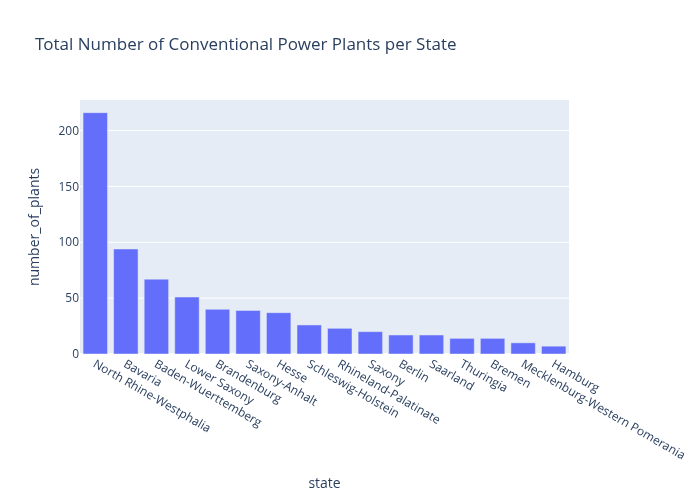

In [29]:
# Create a bar chart showing the total number of power plants per state
fig = px.bar(
    conv_total_plants_state,
    x='state',
    y='number_of_plants',
    title='Total Number of Conventional Power Plants per State'
)
show_fig(fig)

This bar chart shows highly uneven distribution of conventional power plants across German states. North Rhine-Westphalia dominates with over 200 plants - nearly double any other state. Bavaria (100) and Baden-Wuerttemberg (65) form a second tier, while most other states have 10-50 plants each.

This pattern reflects industrial heritage and population density, with Germany's conventional power generation geographically concentrated in a few key states rather than being evenly distributed across the country.

#### Stacked Bar Chart: Total Number of Conventional Power Plants per State and Energy Source

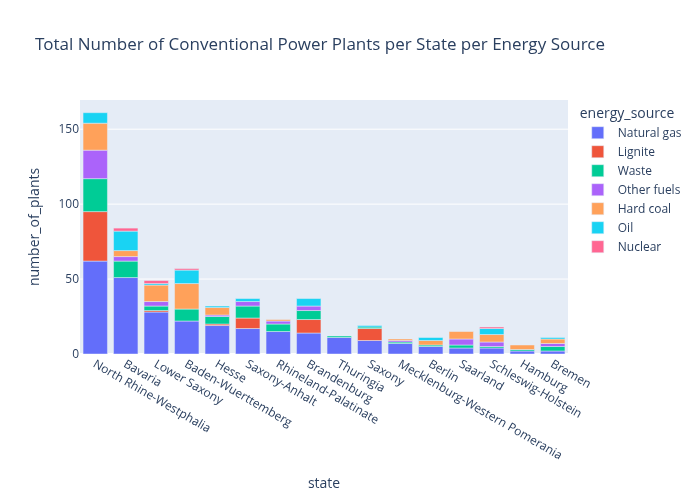

In [30]:
# Create a stacked bar chart incorporating the different energy sources per state 
fig = px.bar(
    conv_number_plants_states_sources,
    x='state',
    y='number_of_plants',
    color = 'energy_source',
    title='Total Number of Conventional Power Plants per State per Energy Source'
)
show_fig(fig)

This stacked bar chart reveals both quantity and energy mix patterns across German states. NNorth Rhine-Westphalia's dominance is even more apparent, with substantial representation across all energy sources - particularly natural gas (blue), lignite (red), and hard coal (orange).

Natural gas dominates most states (large blue sections), while lignite and hard coal are concentrated in specific regions like North Rhine-Westphalia, Brandenburg, and Saxoxny. Smaller states show simpler energy mixes, often relying primarily on one or two sources. This highlights regional energy specialization - industrial states maintain diverse conventional portfolios while smaller states focus on specific technologies.

#### Pie Chart: Distribution of Conventional Energy Sources across Germany by Number of Power Plants

In [31]:
# Create pie chart showing the distribution of energy sources across Germany based on the 
# number of power plants
fig = px.pie(conv_number_plants_sources, 
             values='number_of_plants', 
             names='energy_source', 
             title='Distribution of Conventional Energy Sources across Germany based on the Number of Power Plants'
            )
fig.show()

This pie chart illustrates the distribution of conventional energy sources based on the number of power plants. Natural gas represents the largest share, accounting for approximately 50% of the total. Hard coal and waste are the next most significant sources, each making up about 13%. Lignite comprises 10% of the power plants, while oil accounts for roughly 8%. The remaining sources, grouped as "Other," contribute an additional 8%, and nuclear power plants make up 1% of conventional power plants in Germany.

Overall, the data highlights a strong dependence on natural gas, while hard coal and waste continue to play a substantial role in the energy mix.

### 1.4.2 Visualizations based on the Capacity of Conventional Power Plants in Germany

#### Pie Chart: Distribution of Conventional Energy Sources across Germany by Capacity (MW) of Power Plants

In [32]:
# Create pie chart showing the distribution of energy sources across Germany based on the 
# capacity (MW) of power plants

fig = px.pie(conv_cap_sources, 
             values = 'total_net_capacity', 
             names = 'energy_source', 
             title ='Distribution of Conventional Energy Sources across Germany based on the Capacity of Power Plants'
            )
fig.show()

This pie chart illustrates the distribution of conventional energy sources in Germany based on the capacity (MW) of power plants. The largest share belongs to natural gas (30.5%), followed by hard coal (26.4%) and lignite (24.2%). Nuclear energy accounts for 9.4%, while oil (4.5%), other fuels (3.0%), and waste (1.9%) represent smaller portions of the total capacity.
The chart indicates that natural gas has become the most significant conventional energy source in terms of capacity. However, coal (both hard coal and lignite) still holds a major share, showing that fossil fuels continue to play an important role in Germany’s energy system. The relatively small contribution from nuclear and other sources aligns with Germany’s nuclear phase-out and gradual move toward cleaner and more flexible conventional energy options.

#### Bar Chart: Average Capacity (MW) per Conventional Power Plant per Energy Source

In [33]:
# Create a bar chart visualizing the average capacity per power plant per energy source
fig = px.bar(conv_avg_cap_source, x='energy_source', y='avg_capacity_per_plant',
	        color='energy_source',
                 title='Conventional Energy Sources: Average Capacity (MW) per Plant'
                )
fig.update_layout(width=1000, height=500)

fig.show()

The bar chart shows the average capacity (MW) per plant for different conventional energy sources in Germany. Nuclear plants have the highest average capacity (around 1,350 MW), followed by lignite and hard coal plants (about 350 MW and 300 MW). Other sources such as natural gas, oil, other fuels, and waste have much smaller average capacities.

#### Violin Plot: Net Capacity (MW) per Conventional Power Plant per Energy Source

In [34]:
# Create a violin plot visualizing the distribution of net capacity per power plant per energy source
fig = px.violin(df_conv_power,
                x='energy_source',
                y='capacity_net_bnetza',
                color='energy_source',
                box=True,  
                points='all',  
                title='Distribution of Net Capacity (MW) per Plant by Energy Source')

fig.update_layout(width=1000, height=500)
fig.show()

This violin plot shows the distribution of power plant capacities (in megawatts) across different energy sources in Germany. The width of each "violin" indicates how common plants of that capacity are, while the height shows the range of capacities.
All in all, nuclear plants have by far the largest capacities, clustered around 1,300-1,500 MW per plant. This reflects the nature of nuclear power: few plants, but each with enormous capacity. Other fossil fuels (hard coal, lignite, and natural gas) display wide distributions spanning from small plants (100 MW) to large facilities (up to 1,000 MW), with most concentrated in the 200-400 MW range. Oil, other fuels, and waste plants are small-scale facilities, generally below 300 MW, with waste plants being the smallest.


### 1.4.3 Side-by-Side Pie Charts: Distribution of Conventional Power Plants by Number of Plants and by Net Capacity (MW) 

In [35]:
# Create a subplot showing the distribution of energy sources by number of 
# power plants and by capacity across Germany

fig1 = px.pie(conv_number_plants_sources, 
             values='number_of_plants', 
             names='energy_source'
            )

fig2 = px.pie(conv_cap_sources, 
             values = 'total_net_capacity', 
             names = 'energy_source'
            )

# Create subplot layout with 1 row and 2 columns for pie charts
subplots_fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[
        'Distribution by Number of Plants',
        'Distribution by Capacity (MW)'
    ]
)
# Add traces from the two px pie charts
for trace in fig1.data:
    subplots_fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    subplots_fig.add_trace(trace, row=1, col=2)
    
subplots_fig.update_layout(width=1200, height=500)
subplots_fig.show()

These two pie charts provide a comparison of Germany’s conventional energy mix from two perspectives — the number of power plants and their total capacity (MW). The first chart shows that natural gas dominates in terms of the number of installations, while the second reveals that natural gas, hard coal, and lignite together make up the majority of total generation capacity. 
The comparison highlights that while natural gas plants are most numerous, coal and lignite plants contribute a comparable share of total capacity, reflecting their larger average size. This suggests a structural shift toward more numerous but smaller and more flexible natural gas units, whereas coal-based plants remain key contributors to overall capacity despite ongoing decarbonization efforts. The smaller shares of nuclear and oil confirm Germany’s transition away from these sources.

### 1.4.4 Visualizations showing the Commissionings and Shutdowns of Conventional Power Plants

#### Heatmap: Commissionings of Conventional Power Plants per Decade per Energy Source

In [36]:
# Create a heatmap displaying the commissioned power plants per decade and energy source

fig = px.imshow(
    conv_pivot_comm_source,
    labels=dict(x='energy_source', y='decade', color='count'),
    color_continuous_scale="Reds",
    title='Conventional Power Plants Germany: Commissions per Decade and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1200, height=800)
fig.show()

This heatmap displays when conventional power plants in Germany were commissioned, organized by decade (rows) and energy source (columns). The color intensity and numbers indicate the count of plants built during each period.

The heatmap shows a clear boom in natural gas power plants from the 1990s to the 2010s, with construction peaking at 82 plants in the 1990s, followed by 58 in the 2000s and 63 in the 2010s. 
Hard coal dominated between the 1960s and 1980s, with 28–38 new plants per decade, showing strong industrial growth during that time. Lignite plants were also built steadily, though in smaller numbers.
Nuclear plants were mostly built between the 1970s and 1990s, with very little activity before or after — a sign of policy changes in Germany’s approach to nuclear energy.
In the 2020s, new construction dropped sharply, with only 16 new natural gas plants, highlighting Germany’s shift away from conventional energy toward renewables. Waste-to-energy plants started appearing mainly from the 1970s onward, showing increased interest in environmentally friendly energy solutions.

#### Heatmap: Commissioned Capacity (MW) per Decade and Energy Source

In [37]:
# Create a heatmap displaying the commissioned capacity per decade and energy source

fig = px.imshow(
    conv_pivot_comm_cap_source,
    labels=dict(x='energy_source', y='decade', color='commissioned_capacity'),
    color_continuous_scale="Reds",
    title='Conventional Power Plants Germany: Commissioned Capacity (MW) per Decade and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1200, height=800)
fig.show()

The heatmap displays the commissioned capacity (in MW) of conventional power plants in Germany by decade and energy source. Darker shades indicate higher installed capacity. The timeline ranges from the 1910s to the 2020s, showing how different energy sources contributed to Germany’s total installed capacity over time. 
The 1970s and 1980s were peak decades for conventional power plant construction, with hard coal, lignite, nuclear, and natural gas all reaching high capacity levels. The 1980s stand out with the largest overall commissioned capacity, driven by hard coal and nuclear expansion.
In later decades, natural gas became more dominant, particularly from the 1990s to 2010s, reflecting Germany’s shift toward more flexible and cleaner-burning energy sources.
By the 2020s, new installations dropped sharply across all fuels, indicating a clear transition away from conventional energy toward renewable sources.

#### Heatmap: Number of Shutdowns of Conventional Power Plants per Year per Energy Source

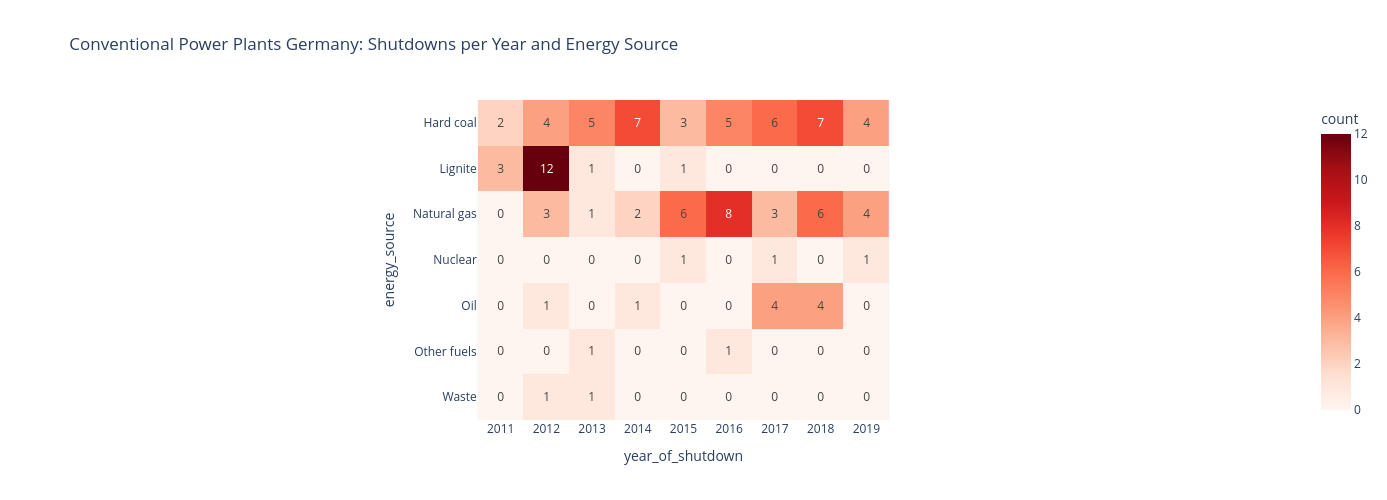

In [38]:
# Create a heatmap displaying the amount of shutdowns per year and energy source
conv_shutdown_plants.columns
conv_pivot_shutdown_plants
fig = px.imshow(
    conv_pivot_shutdown_plants,
    labels=dict(x='year_of_shutdown', y='energy_source', color='count'),
    color_continuous_scale="Reds",
    title='Conventional Power Plants Germany: Shutdowns per Year and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1000, height=500)
fig.show()

The heatmap shows the number of conventional power plant shutdowns in Germany per year (2011–2019) and energy source. Darker shades indicate years with a higher number of shutdowns for a particular source.
Between 2011 and 2019, hard coal and natural gas plants saw the most frequent shutdowns, reflecting Germany’s gradual move away from traditional fossil fuels. Lignite shows a sharp peak in 2012 with 12 shutdowns, possibly linked to early steps in Germany’s energy transition.
Oil and nuclear plants experienced fewer but steady closures, consistent with the country’s nuclear phase-out policy and declining oil use. Overall, the pattern illustrates Germany’s ongoing shift toward renewable energy sources.

#### Heatmap: Capacity (MW) of Shutdowns of Conventional Power Plants per Year per Energy Source

In [39]:
# Create a heatmap displaying the capacity of shutdowns per year and energy source
fig = px.imshow(
    conv_pivot_shutdown_cap,
    labels=dict(x='year_of_shutdown', y='energy_source', color='sum_capacity_shutdown'),
    color_continuous_scale="Reds",
    title='Conventional Power Plants Germany: Capacity (MW) of Shutdowns per Year and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1200, height=500)
fig.show()

The heatmap displays the total decommissioned capacity (in MW) of conventional power plants in Germany from 2011 to 2019, categorized by energy source. Darker shades represent years with higher total shutdown capacity for each source.
The largest capacity shutdowns occurred for hard coal, especially between 2014 and 2017, when multiple large plants were decommissioned. Lignite shows significant capacity losses in 2012, while nuclear energy experienced sharp drops in 2015, 2017, and 2019, consistent with Germany’s nuclear phase-out policy.
Natural gas plants were steadily shut down across the decade, though with smaller capacities compared to coal and nuclear.


## Summary Key Insights: Conventional Power Plants in Germany

All in all, Germany’s conventional power generation is highly concentrated. North Rhine-Westphalia leads both in the number of plants (216) and total installed capacity across several energy sources. Bavaria and Baden-Württemberg follow as secondary hubs, while smaller states contribute only limited conventional capacity. In addition to that, Germany's federal states specialize in different types of conventional energy sources: North Rhine-Westphalia dominates in lignite and gas, Bavaria combines gas and nuclear, and Brandenburg and Saxony focus mainly on lignite.

Natural gas has become the dominant conventional energy source in terms of both number of plants and total capacity. Coal (hard coal and lignite) still accounts for a major share of total capacity, but new installations have declined sharply, and shutdowns have increased since the 2010s. Nuclear power features the highest average plant capacity, but few installations and ongoing decommissioning reflect Germany’s nuclear phase-out policy. 
Overall, the data shows that fewer new conventional power plants are being built, while more are being shut down. This points to Germany’s clear move toward renewable energy and cleaner technologies.

# 2 Renewable Power Plants Germany

## 2.1 Data Inspection: Renewable Power Plants

In [40]:
#Load and preview csv-file containing data about renewable power plants in Germany

df_renew_power = pd.read_csv('/home/lazor/Documents/github/Python/EDA_German_Power_Plants/Data/Data_Renewable_Power_Plants_Germany.csv')
df_renew_power.head()
df_renew_power.columns

/tmp/ipykernel_10057/4244905664.py:3: DtypeWarning:

Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'municipality_code', 'postcode', 'address', 'federal_state',
       'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id',
       'dso', 'dso_id', 'tso'],
      dtype='object')

In [41]:
# Inspect the dataframe using summarytools
dfSummary(df_renew_power)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,electrical_capacity[float64],Mean (sd) : 0.1 (0.4)min < med < max:0.0 < 0.0 < 138.9IQR (CV) : 0.0 (0.1),"41,321 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
2,energy_source_level_1[object],1. Renewable energy,"1,768,745 (100.0%)",,0(0.0%)
3,energy_source_level_2[object],1. Solar2. Wind3. Bioenergy4. Hydro5. Geothermal,"1,725,093 (97.5%)22,281 (1.3%)14,399 (0.8%)6,961 (0.4%)11 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSElEQVR4nO3dMW7aYBjH4dcWSsNihJByhHbjABwih+0hfADG3gEhPJQkizskVEnarfC35D7P5u0dfsJ86HtFM45jQUI79QD8P8RGjNiIaapqWVV3Uw/CLL2M43i+PCw2m81j13XrKSdinoZhODZN8/0S3KLruvVutzuvVqunqYdjPk6n033f9+vD4XBXVa+xVVWtVqunh4eHn5NOxxwt3z84IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMYuq1+sgUw/CvPytqcUwDMe+79f16ToI/KthGI5V9XJ5di2cW/pwLbyxN0qKAwIx71+jHz7y4Np+b1d93oSBa2u7rltvt9t6W+dzUOBm2qqq5XL5PPUgzJ8DAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01ZVnc/nL1MPwvy1wzAc9/v9H5swcG2uhRNju4oYBwRiLq/R8grl1habzeaxqspmFbfWdl23tllFgu9sxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGLt62qKptV3Jhr4cTYriLGJxsxFl6IsfBCjJ8+iBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERoztKmLsIBBju4oY39mIaZum+dY0zf3UgzB/bVV9rSr/pMzNeY0SIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmLaqflTV89SDMH8WXojxGiVGbMSIjZhfBeWPQbpMUdEAAAAASUVORK5CYII="">",0(0.0%)
4,energy_source_level_3[object],1. nan2. Biomass and biogas3. Sewage and landfill gas,"1,754,346 (99.2%)13,923 (0.8%)476 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABeklEQVR4nO3csW3bUBiF0f8RRBw3JAQCGsHZQUO49Z4ZQkNkCUEsYlsNXdgeQfcB9DmVylt8EEmBT23btoKEofcAfo5WVY9V9av3EHbvNi7L8jxN06H3EvZtXdfLOE3T4XQ6vc7z/NZ7EPt0vV5/n8/nw1hVNc/z2/F4/N97FLv26AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFj1ef7Rr2HsF/ffbVlWV68qcu9ret6cQaBlFtzlI+U72+22rbttfMWdm5cluW5qqq19ldw3NMwTdPh6wHBfRt35Xc2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixETOu63r5+nzruoTdcwaBGKeriHHPRozYiBlaa39aa/7rg7sbquqpqh56D2H/XEaJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzFBV/6rqvfcQ9s/pKmJcRon5ACasPKRhHTSDAAAAAElFTkSuQmCC"">","1,754,346(99.2%)"
5,technology[object],1. Photovoltaics2. Onshore3. Biomass and biogas4. Run-of-river5. Offshore6. Sewage and landfill gas7. Photovoltaics ground8. Geothermal,"1,724,918 (97.5%)21,547 (1.2%)13,923 (0.8%)6,961 (0.4%)734 (0.0%)476 (0.0%)175 (0.0%)11 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADBklEQVR4nO3dMW4bVxhG0X8IwrEaEgIBLyHptAAtwovNIrgAldmDIGiKyHbDFLYC20kX8RJgzunYveKCjyTmk5bT6TRQ2Fz6APx/iI2M2MiIjYzYyIiNzDIzNzPz7tIH4Sp9OZ1OL68vtofD4eNut7u95Im4Tuu6Pi3L8vtrcNvdbnd7f3//st/vP136cFyP5+fn98fj8fbx8fHdzHyNbWZmv99/+vDhw58XPR3X6Ob7F74gkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnOfH0c5NIH4br8W1PbdV2fjsfj7fz0OAj8V+u6Ps3Ml9fXHgvnnH54LHzx5xeofP/O9kOF8Nb+Hrz8PE6At7bZ7Xa3d3d3821h5bMbZ7OZmbm5ufl86YNw/fyoS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmYzM/Py8vLLpQ/C9dus6/r08PDw

The dataset df_renew_power has 1,768,745 rows and 23 columns, containing both categorical (energy sources, technology, regions, municipalities, grid operators) and numerical data (electrical capacity, coordinates, IDs, postcodes). Some columns, like decommissioning_date, municipality, address, and energy_source_level_3, have substantial missing values, while key information such as energy_source_level_1, technology, data_source, and regional identifiers (nuts levels, federal_state) is mostly complete. Overall, despite gaps in certain details, the dataset provides comprehensive information on renewable energy installations suitable for general analysis.

## 2.2 Data Cleansing: Renewable Power Plants

Similarly to the dataset on conventional power plants, the dataset of renewable power plants is inspected and cleaned. The goal is to ensure that only relevant and valid entries remain, that is power plants located in Germany and classified as renewable. The cleansing process also focuses on improving data consistency in the columns describing energy sources.

#### Inspection and Cleansing of Column 'federal_state'

In [42]:
# Inspect federal_state column
df_renew_power['federal_state'].unique()

array(['Baden-Württemberg', 'Brandenburg', 'Sachsen',
       'Nordrhein-Westfalen', 'Bayern', 'Saarland', 'Hamburg',
       'Thüringen', 'Rheinland-Pfalz', 'Niedersachsen',
       'Baden-Würtemberg', 'Mecklenburg-Vorpommern', 'Hessen',
       'Sachsen-Anhalt', 'Bremen', 'Berlin ', 'Berlin',
       'Schleswig-Holstein', 'Ausschließliche Wirtschaftszone', 'Ausland',
       nan], dtype=object)

In [43]:
# Count occurrences of 'nan' in 'federal_state' column
df_renew_power['federal_state'].isna().sum()
# The column 'federal_state' has 6 NaN values, 
# due to this low number of missing values, they will be simply removed.

# Drop rows where 'federal_state' has a missing value
df_renew_power = df_renew_power[df_renew_power['federal_state'].notna()]
df_renew_power['federal_state'].unique()

array(['Baden-Württemberg', 'Brandenburg', 'Sachsen',
       'Nordrhein-Westfalen', 'Bayern', 'Saarland', 'Hamburg',
       'Thüringen', 'Rheinland-Pfalz', 'Niedersachsen',
       'Baden-Würtemberg', 'Mecklenburg-Vorpommern', 'Hessen',
       'Sachsen-Anhalt', 'Bremen', 'Berlin ', 'Berlin',
       'Schleswig-Holstein', 'Ausschließliche Wirtschaftszone', 'Ausland'],
      dtype=object)

In [44]:
# Count occurrences of 'Ausland' in 'federal_state' column
df_renew_power[df_renew_power['federal_state'] == 'Ausland'].count()
# Remove the 5 occurrences of 'Ausland' as this analysis focuses on Germany 
df_renew_power = df_renew_power[df_renew_power['federal_state'] != 'Ausland']
df_renew_power['federal_state'].unique()

array(['Baden-Württemberg', 'Brandenburg', 'Sachsen',
       'Nordrhein-Westfalen', 'Bayern', 'Saarland', 'Hamburg',
       'Thüringen', 'Rheinland-Pfalz', 'Niedersachsen',
       'Baden-Würtemberg', 'Mecklenburg-Vorpommern', 'Hessen',
       'Sachsen-Anhalt', 'Bremen', 'Berlin ', 'Berlin',
       'Schleswig-Holstein', 'Ausschließliche Wirtschaftszone'],
      dtype=object)

In [45]:
# Replace German names of federal states with their English equivalents
# Create a mapping dictionary
state_mapping = {
    'Baden-Württemberg': 'Baden-Wuerttemberg',
    'Bayern': 'Bavaria',
    'Berlin': 'Berlin',
    'Brandenburg': 'Brandenburg',
    'Bremen': 'Bremen',
    'Hamburg': 'Hamburg',
    'Hessen': 'Hesse',
    'Mecklenburg-Vorpommern': 'Mecklenburg-Western Pomerania',
    'Niedersachsen': 'Lower Saxony',
    'Nordrhein-Westfalen': 'North Rhine-Westphalia',
    'Rheinland-Pfalz': 'Rhineland-Palatinate',
    'Saarland': 'Saarland',
    'Sachsen': 'Saxony',
    'Sachsen-Anhalt': 'Saxony-Anhalt',
    'Schleswig-Holstein': 'Schleswig-Holstein',
    'Thüringen': 'Thuringia', 
    'Ausschließliche Wirtschaftszone' : 'Exclusive Economic Zone'
}

# Apply mapping to column 'state'
df_renew_power['federal_state'] = df_renew_power['federal_state'].map(state_mapping)

# Check whether mapping was successful
df_renew_power['federal_state'].unique()

array(['Baden-Wuerttemberg', 'Brandenburg', 'Saxony',
       'North Rhine-Westphalia', 'Bavaria', 'Saarland', 'Hamburg',
       'Thuringia', 'Rhineland-Palatinate', 'Lower Saxony', nan,
       'Mecklenburg-Western Pomerania', 'Hesse', 'Saxony-Anhalt',
       'Bremen', 'Berlin', 'Schleswig-Holstein',
       'Exclusive Economic Zone'], dtype=object)

In [46]:
# Rename column 'federal_state' to 'state' in order to be consistent with the dataframe on conventional power plants
df_renew_power = df_renew_power.rename(columns = {'federal_state' : 'state' })
df_renew_power.columns

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'municipality_code', 'postcode', 'address', 'state',
       'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id',
       'dso', 'dso_id', 'tso'],
      dtype='object')

#### Inspection and Cleansing of Columns 'energy_source_level_1-3'

This section inspects and cleans the columns on energy sources: 'energy_source_level_1' is always 'Renewable energy' while level_2 includes broader categories and level_3 provides bioenergy subtypes. Bioenergy entries in level 2 are replaced with their level 3 subcategories where available, and 'energy_source_level_2' is renamed 'energy_source' for further analysis.

In [47]:
# Unique values of column 'energy_source_level_1'
df_renew_power['energy_source_level_1'].unique()
# The column energy_source_level_1 contains the value 'renewable energy' for all 
# entries and will not be explored here any further

array(['Renewable energy'], dtype=object)

In [48]:
# Unique values of column 'energy_source_level_2'
df_renew_power['energy_source_level_2'].unique()

array(['Bioenergy', 'Hydro', 'Wind', 'Solar', 'Geothermal'], dtype=object)

In [49]:
# Unique values of column 'energy_source_level_3'
df_renew_power['energy_source_level_3'].unique()

array(['Sewage and landfill gas', nan, 'Biomass and biogas'], dtype=object)

In [50]:
# It is hypothesized, that 'Bioenergy' on level 2 splits up into 'Sewage and landfill gas', nan and 'Biomass and biogas' on Level 3. 
# To verify this, all unique combinations of level 2 and level 3 energy sources are investigated:

df_renew_power[['energy_source_level_2', 'energy_source_level_3']].drop_duplicates()

,energy_source_level_2,energy_source_level_3
0,Bioenergy,Sewage and landfill gas
1,Hydro,NaN
17,Bioenergy,Biomass and biogas
1444,Wind,NaN
1465,Solar,NaN
328220,Geothermal,NaN


In [51]:
# In order to obtain a more detailed breakdown of bioenergy, the 'Bioenergy' label at 
# 'energy source level 2' will be replaced by the specific subcategories 
# provided at level 3.

# Replace level 2 values with 'Bioenergy' only when level 3 is one of the 
# specified types of 'bioenergy_types' (and not NaN)

mask = (df_renew_power['energy_source_level_2'] == 'Bioenergy') & df_renew_power['energy_source_level_3'].notnull()
df_renew_power.loc[mask, 'energy_source_level_2'] = df_renew_power.loc[mask, 'energy_source_level_3']

# Check whether replacement was successful
df_renew_power[['energy_source_level_2', 'energy_source_level_3']].drop_duplicates()
# Analogous to the section on conventional power plants, the column energy_source_level_2 
#will be used for further analysis.
# To maintain consistency in naming, the column will be renamed to energy_source.

df_renew_power = df_renew_power.rename(columns = {'energy_source_level_2': 'energy_source'})
df_renew_power.columns

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'municipality_code', 'postcode', 'address', 'state',
       'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id',
       'dso', 'dso_id', 'tso'],
      dtype='object')

In [52]:
# Drop several columns which are not relevant for this analysis
df_renew_power = df_renew_power.drop(['energy_source_level_1', 'energy_source_level_3', 'technology', 'voltage_level', 'address', 'data_source', 'nuts_1_region', 'nuts_2_region', 'nuts_3_region', 'postcode', 'lat', 'lon', 'municipality', 'municipality_code', 'eeg_id', 'dso', 'dso_id', 'tso'], axis = 1)
df_renew_power.columns

Index(['electrical_capacity', 'energy_source', 'state', 'commissioning_date',
       'decommissioning_date'],
      dtype='object')

## 2.3 Data Analysis: Renewable Power Plants

### 2.3.1 Analysis of Renewable Energy Sources across the Federal States

This section explores the distribution of renewable power plants across Germany’s federal states and energy sources.
The analysis examines: 

- the number of plants by state and energy source

- the total installed net capacity

- the average capacity per plant by energy source

Only active (non-shutdown) power plants are considered.

In [53]:
# Count total number of power plants per state

# Since df_renew_power does not contain the names of the power plants, the capacity column is 
# used to count entries, as it does not contain any NaN values.

renew_total_plants_state = df_renew_power.groupby('state').agg({'electrical_capacity':'count'}).sort_values(by = 'electrical_capacity', ascending = False).rename(columns = {'electrical_capacity': 'number_of_plants'}).reset_index()
renew_total_plants_state

,state,number_of_plants
0,Brandenburg,470567
1,Baden-Wuerttemberg,311690
2,North Rhine-Westphalia,264916
3,Lower Saxony,166874
4,Bavaria,118130
5,Rhineland-Palatinate,102279
6,Hamburg,84846
7,Saarland,72804
8,Saxony,41410
9,Hesse,33285


The table shows the number of renewable power plants in each German state as well as the Exclusive Economic Zone. Brandenburg has the highest number of plants: 470,567.
Baden-Wuerttemberg and North Rhine-Westphalia follow with 311,690 and 264,916 plants, respectively. The smallest counts are in Berlin (276), Schleswig-Holstein (911), and the Exclusive Economic Zone (687).
All in all, renewable energy plant distribution is highly uneven across Germany, with rural, large, or wind/solar-friendly regions dominating, and urban states showing very low numbers.

In [54]:
# Investigate which energy source is most prevalent in which federal state 

renew_number_plants_states_sources = df_renew_power.groupby(['state', 'energy_source']).size().reset_index(name='number_of_plants').sort_values(by='number_of_plants', ascending=False)
renew_number_plants_states_sources

,state,energy_source,number_of_plants
20,Brandenburg,Solar,460685
4,Baden-Wuerttemberg,Solar,307697
51,North Rhine-Westphalia,Solar,260035
41,Lower Saxony,Solar,159272
10,Bavaria,Solar,116535
57,Rhineland-Palatinate,Solar,100230
31,Hamburg,Solar,83333
62,Saarland,Solar,69004
67,Saxony,Solar,39919
36,Hesse,Solar,32961


The table breaks down the number of renewable power plants by state and energy source in Germany. Solar dominates across almost all states, with Brandenburg, Baden-Württemberg, and North Rhine-Westphalia having the highest counts. Wind, biomass and biogas, and hydro are present in smaller numbers, while geothermal and sewage/landfill gas appear very rarely. City-states like Berlin, Bremen, and Hamburg generally have low counts for all sources.

In [55]:
# Investivate which energy sources are most prevalent across all states based on the 
# number of power plants 
renew_number_plants_sources = ( df_renew_power 
.groupby('energy_source')
.size()
.reset_index(name = 'number_of_plants')
.sort_values(by = 'number_of_plants', ascending = False)
)
renew_number_plants_sources

,energy_source,number_of_plants
4,Solar,1725082
5,Wind,22281
0,Biomass and biogas,13923
2,Hydro,6961
3,Sewage and landfill gas,476
1,Geothermal,11


The table shows the total number of renewable power plants by energy source across Germany. Solar dominates overwhelmingly with 1,725,082 plants, followed by Wind (22,281) and Biomass and biogas (13,923). Hydro, Sewage and landfill gas, and Geothermal have far fewer installations, with Geothermal being almost negligible at 11 plants.

In [56]:
# Investivate which energy sources are most prevalent across all states based on the 
# capacity of power plants in MW 
df_renew_power.columns
renew_cap_sources = df_renew_power.groupby('energy_source')['electrical_capacity'].sum().reset_index(name = 'total_capacity').sort_values(by = 'total_capacity', ascending = False)
renew_cap_sources

,energy_source,total_capacity
5,Wind,45734.423297
4,Solar,44071.229992
0,Biomass and biogas,7756.573031
2,Hydro,1543.214755
3,Sewage and landfill gas,218.710595
1,Geothermal,45.594000


In [57]:
# Investivate which energy sources are most prevalent across all states based on 
# the capacity of power plants in MW 
renew_cap_sources = df_renew_power.groupby('energy_source')['electrical_capacity'].sum().reset_index(name = 'total_capacity').sort_values(by = 'total_capacity', ascending = False)
renew_cap_sources

,energy_source,total_capacity
5,Wind,45734.423297
4,Solar,44071.229992
0,Biomass and biogas,7756.573031
2,Hydro,1543.214755
3,Sewage and landfill gas,218.710595
1,Geothermal,45.594000


In [58]:
# Calculation of average capacity per power plant per 'energy_source'
# According to the documentation on the data,  'electrical_capacity' refers to 
# the installed electrical capacity in MW 
#(https://nbviewer.org/github/Open-Power-System-Data/renewable_power_plants/blob/2020-08-25/main.ipynb)
renew_avg_cap_source = df_renew_power.groupby('energy_source').agg({'electrical_capacity': 'mean'}).reset_index()
renew_avg_cap_source = renew_avg_cap_source.rename(columns={'electrical_capacity': 'avg_capacity_per_plant'})
renew_avg_cap_source

,energy_source,avg_capacity_per_plant
0,Biomass and biogas,0.557105
1,Geothermal,4.144909
2,Hydro,0.221694
3,Sewage and landfill gas,0.459476
4,Solar,0.025547
5,Wind,2.052620


In [59]:
# Investigate which energy source is most prevalent in which federal state by total net capacity
renew_cap_states_sources = df_renew_power.groupby(
    ['state', 'energy_source']).agg(
    {'electrical_capacity':'sum'}).reset_index()
# Rename column 'electrical_capacity' to 'total_net_capacity' 
renew_cap_states_sources = renew_cap_states_sources.rename(
    columns = {'electrical_capacity':'total_net_capacity'})
# Convert values of column 'total_net_capacity' to integers
renew_cap_states_sources['total_net_capacity'] = renew_cap_states_sources['total_net_capacity'].astype(int)
renew_cap_states_sources.head()


,state,energy_source,total_net_capacity
0,Baden-Wuerttemberg,Biomass and biogas,821
1,Baden-Wuerttemberg,Geothermal,0
2,Baden-Wuerttemberg,Hydro,336
3,Baden-Wuerttemberg,Sewage and landfill gas,29
4,Baden-Wuerttemberg,Solar,5553


### 2.3.2 Analysis of Reduced Data Frame 'renew_states_comm_source' 

In [60]:
#Create reduced dataframe 'states_comm_source' containing columns 'state', 
# 'commissioned', 'energy_source', 'electrical_capacity'
renew_states_comm_source = df_renew_power[['state', 'commissioning_date', 'energy_source', 'electrical_capacity']]
renew_states_comm_source.head()
# For further analysis, the year of commissioning will be taken into consideration. 
#However, the data in the column 'commissioning_year' is in
# the format YYYY-MM-DD. 

# Remove NaN values from 'commissioning_date'
renew_states_comm_source = renew_states_comm_source[renew_states_comm_source['commissioning_date'].notnull()]
renew_states_comm_source['commissioning_date'].isnull().sum()
renew_states_comm_source['commissioned'] = renew_states_comm_source['commissioning_date'].str.split('-').str[0].astype('int')
renew_states_comm_source.head()


,state,commissioning_date,energy_source,electrical_capacity,commissioned
0,Baden-Wuerttemberg,1900-01-02,Sewage and landfill gas,0.080,1900
1,Brandenburg,1901-01-01,Hydro,0.015,1901
2,Baden-Wuerttemberg,1901-01-01,Hydro,0.055,1901
3,Baden-Wuerttemberg,1901-01-01,Hydro,0.120,1901
4,Baden-Wuerttemberg,1901-07-01,Hydro,0.044,1901


In [61]:
#Extract decade from 'commissioning_date' and store in newly-created column 'decade'
def get_decade (year):
    if year < 1910:
        return '1900s'
    elif year < 1920:
        return '1910s'
    elif year < 1930:
        return '1920s'
    elif year < 1940:
        return '1930s'
    elif year < 1950:
        return '1940s'
    elif year < 1960:
        return '1950s'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'
        
renew_states_comm_source = renew_states_comm_source.copy()
renew_states_comm_source['decade'] = renew_states_comm_source['commissioned'].apply(get_decade)
renew_states_comm_source.head()

,state,commissioning_date,energy_source,electrical_capacity,commissioned,decade
0,Baden-Wuerttemberg,1900-01-02,Sewage and landfill gas,0.080,1900,1900s
1,Brandenburg,1901-01-01,Hydro,0.015,1901,1900s
2,Baden-Wuerttemberg,1901-01-01,Hydro,0.055,1901,1900s
3,Baden-Wuerttemberg,1901-01-01,Hydro,0.120,1901,1900s
4,Baden-Wuerttemberg,1901-07-01,Hydro,0.044,1901,1900s


##### renew_states_comm_source: Number of Power Plants per 'decade' and 'energy source'

In [62]:
#Group renew_states_comm_source by 'decade' and 'energy source', then count the number of entries per group
renew_comm_source = renew_states_comm_source.groupby([ 'decade', 'energy_source']).size().reset_index(name = 'count')
renew_comm_source
# Create a pivot table to show the number of commissioned units per 'energy_source' by 'decade'
renew_pivot_comm_source = pd.pivot_table(renew_comm_source,
    index = 'decade',
    columns = 'energy_source',
    values = 'count'
)
renew_pivot_comm_source.head()

energy_source,Biomass and biogas,Geothermal,Hydro,Sewage and landfill gas,Solar,Wind
decade,,,,,,
1900s,1.0,NaN,59.0,1.0,NaN,NaN
1910s,NaN,NaN,46.0,1.0,NaN,NaN
1920s,NaN,NaN,87.0,NaN,NaN,NaN
1930s,NaN,NaN,51.0,NaN,NaN,NaN
1940s,NaN,NaN,61.0,NaN,NaN,NaN


##### renew_states_comm_source: Number of Power Plants per 'decade', 'energy source' and 'state'

In [63]:
#Group renew_comm_source by 'state', 'decade' and 'energy source', then count the number of entries per group
renew_states_count_source = renew_states_comm_source.groupby(['state', 'decade', 'energy_source']).size().reset_index(name = 'count')
renew_states_count_source

# Create a pivot table to show the number of commissioned power plants per 'energy_source' by 'decade' and 'state'
renew_pivot_states_count_source = pd.pivot_table(renew_states_count_source, 
                                    index = ['state', 'decade'], 
                                    columns = 'energy_source',
                                    values = 'count'
)
renew_pivot_states_count_source
# Replace missing values with '0'
renew_pivot_states_count_source = renew_pivot_states_count_source.fillna(0)
renew_pivot_states_count_source.sample(10)

energy_source                Biomass and biogas  Geothermal  Hydro  \
state                decade                                          
Baden-Wuerttemberg   1960s                  1.0         0.0   15.0   
Berlin               2010s                  1.0         0.0    0.0   
Thuringia            1910s                  0.0         0.0    1.0   
Saxony               1980s                  0.0         0.0    3.0   
                     1920s                  0.0         0.0    4.0   
Saarland             1980s                  1.0         0.0    2.0   
Lower Saxony         1980s                  0.0         0.0   31.0   
Brandenburg          1990s                 71.0         0.0  345.0   
Rhineland-Palatinate 1940s                  0.0         0.0    1.0   
Saarland             1900s                  0.0         0.0    2.0   

energy_source                Sewage and landfill gas   Solar   Wind  
state                decade                                          
Baden-Wuerttemberg   1960s                       0.0     0.0    0.0  
Berlin               2010s                       0.0   253.0    1.0  
Thuringia            1910s                       0.0     0.0    0.0  
Saxony               1980s                       0.0     0.0    0.0  
                     1920s                       0.0     0.0    0.0  
Saarland             1980s                       4.0     2.0    7.0  
Lower Saxony         1980s                       2.0     0.0    7.0  
Brandenburg          1990s                      17.0  1912.0  245.0  
Rhineland-Palatinate 1940s                       0.0     0.0    0.0  
Saarland             1900s                       0.0     0.0    0.0

##### renew_states_comm_source: Commissioned Capacity per 'decade' and 'energy source' 

In [64]:
#Group renew_states_comm_source by 'decade', 'energy source' and 'electrical_capacity', then calculate 
#the installed capacity
renew_comm_cap_source = renew_states_comm_source.groupby(['decade', 'energy_source']).agg({'electrical_capacity': 'sum'}).reset_index()
# Rename column 'electrical_capacity' to 'commissioned_capacity'
renew_comm_cap_source =renew_comm_cap_source.rename(columns = {'electrical_capacity': 'commissioned_capacity'})
# Convert 'commissioned_capacity' to integer
renew_comm_cap_source['commissioned_capacity'] = renew_comm_cap_source['commissioned_capacity'].astype(int)
renew_comm_cap_source.head()

,decade,energy_source,commissioned_capacity
0,1900s,Biomass and biogas,1
1,1900s,Hydro,11
2,1900s,Sewage and landfill gas,0
3,1910s,Hydro,20
4,1910s,Sewage and landfill gas,0


In [65]:
# Group renew_states_comm_source by 'decade', 'energy source' and capacity and 'state', 
# then calculate the installed capacity
renew_comm_cap_source_state = renew_states_comm_source.groupby(['decade', 'energy_source', 'state']).agg({'electrical_capacity': 'sum'}).reset_index()
# Rename column 'electrical_capacity' to 'commissioned_capacity'
renew_comm_cap_source_state = renew_comm_cap_source_state.rename(columns = {'electrical_capacity': 'commissioned_capacity'})
renew_comm_cap_source_state['commissioned_capacity'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 328 entries, 0 to 327
Series name: commissioned_capacity
Non-Null Count  Dtype  
--------------  -----  
328 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [66]:
# Create a pivot table to show the amount of commissioned capacity per 'energy_source' per 'decade'
renew_pivot_comm_cap_source = pd.pivot_table(renew_comm_cap_source, 
                                    index = ['decade'], 
                                    columns = 'energy_source',
                                    values = 'commissioned_capacity'
)
renew_pivot_comm_cap_source
# Replace missing values with '0'
renew_pivot_comm_cap_source = renew_pivot_comm_cap_source.fillna(0)
# Round conv_comm_cap_source to one decimal place
renew_pivot_comm_cap_source = renew_pivot_comm_cap_source.round(1)
renew_pivot_comm_cap_source.head()

energy_source,Biomass and biogas,Geothermal,Hydro,Sewage and landfill gas,Solar,Wind
decade,,,,,,
1900s,1.0,0.0,11.0,0.0,0.0,0.0
1910s,0.0,0.0,20.0,0.0,0.0,0.0
1920s,0.0,0.0,169.0,0.0,0.0,0.0
1930s,0.0,0.0,31.0,0.0,0.0,0.0
1940s,0.0,0.0,13.0,0.0,0.0,0.0


### 2.3.3 Analysis of Column on Decommissioning
As df_renew_power reveals, there are no entries for the column on decommissioning so this will not be explored here any further

## 2.4 Data Visualization: Renewable Power Plants

### 2.4.1 Visualizations based on the Total Number of Renewable Power Plants in Germany

#### Bar Chart: Total Number of Renewable Power Plants per State

In [67]:
# Create a bar chart showing the total number of power plants per state
fig = px.bar(
    renew_total_plants_state,
    x='state',
    y='number_of_plants',
    title='Total Number of Renewable Power Plants per State'
)
fig.update_layout(width=1000, height=500)
fig.show()

#### Stacked Bar Chart: Total Number of Renewable Power Plants per State and Energy Source

In [68]:
# Create a stacked bar chart incorporating the different energy sources per state 
fig = px.bar(
    renew_number_plants_states_sources,
    x='state',
    y='number_of_plants',
    color = 'energy_source',
    title='Total Number of Renewable Power Plants per State per Energy Source'
)
fig.update_layout(width=1000, height=400)
fig.show()

#### Pie Chart: Distribution of Renewable Energy Sources across Germany by Number of Power Plants

In [69]:
# Create pie chart showing the distribution of energy sources across Germany based on the 
# number of power plants
fig = px.pie(renew_number_plants_sources, 
             values='number_of_plants', 
             names='energy_source', 
             title='Distribution of Renewable Energy Sources across Germany based on the Number of Power Plants'
            )
fig.update_layout(width=1000, height=900)
fig.show()

### 2.4.2 Visualizations based on the Capacity of Renewawble Power Plants in Germany

#### Pie Chart: Distribution of Renewable Energy Sources across Germany by Capacity (MW) of Power Plants

In [70]:
# Create pie chart showing the distribution of energy sources across Germany based on the 
# capacity (MW) of power plants

fig = px.pie(renew_cap_sources, 
             values = 'total_capacity', 
             names = 'energy_source', 
             title ='Distribution of Renewable Energy Sources across Germany based on the Capacity of Power Plants'
            )
fig.update_layout(width=1000, height=500)
fig.show()

#### Bar Chart: Average Capacity (MW) per Renewable Power Plant per Energy Source

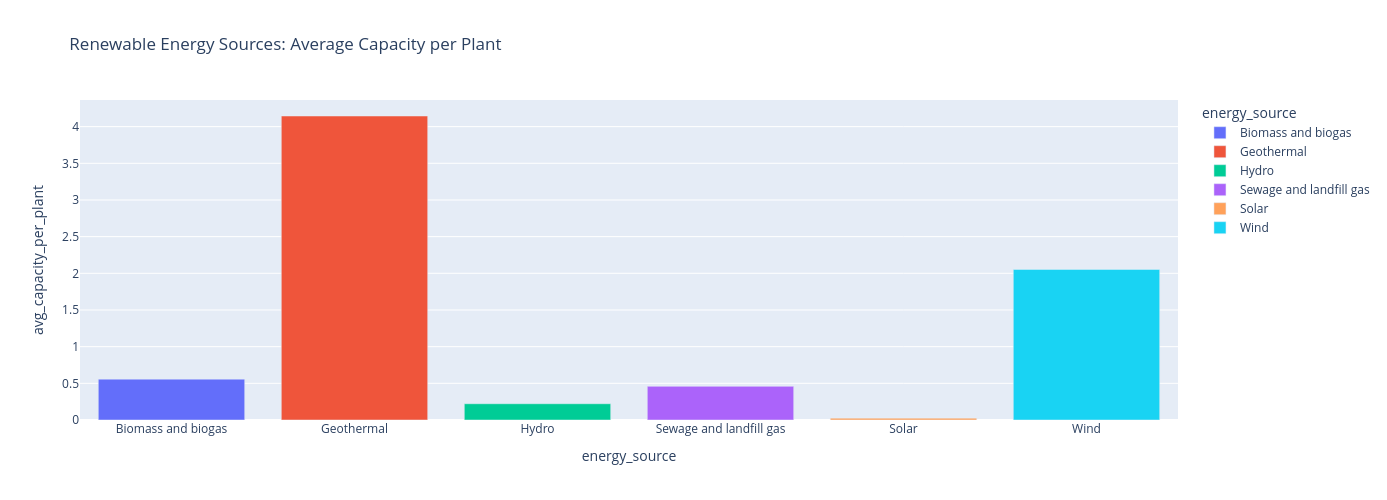

In [71]:
# Create a bar chart visualizing the average capacity per power plant per energy source
fig = px.bar(renew_avg_cap_source, x='energy_source', y='avg_capacity_per_plant',
	        color='energy_source',
                 title='Renewable Energy Sources: Average Capacity per Plant'
                )
fig.update_layout(width=1200, height=500)

fig.show()

### 2.4.3 Side-by-Side Pie Charts: Distribution of Renewable Power Plants by Number of Plants and by Net Capacity (MW) 

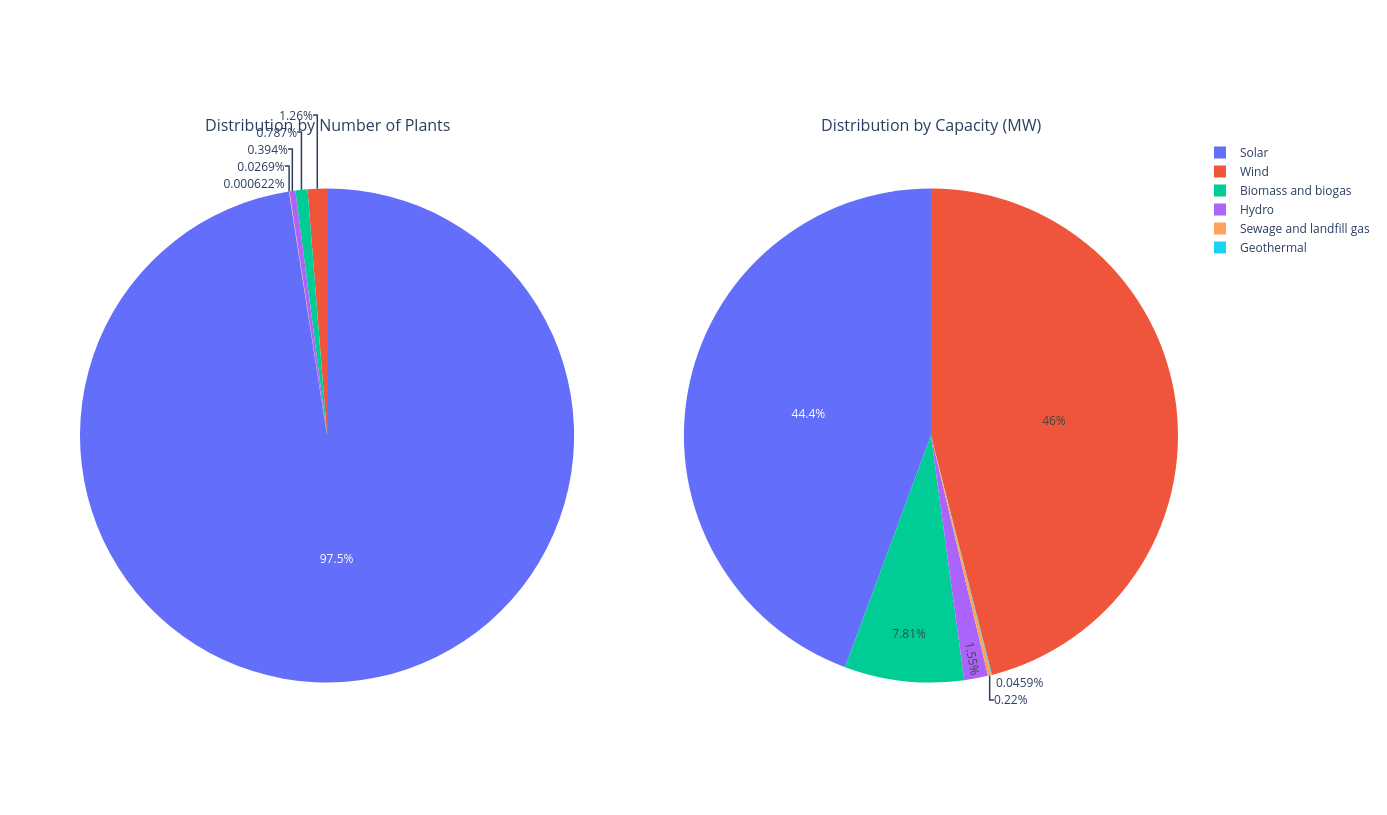

In [72]:
# Create a subplot showing the distribution of energy sources by number of power plants and by 
# capacity across Germany

fig1 = px.pie(renew_number_plants_sources, 
             values='number_of_plants', 
             names='energy_source'
            )

fig2 = px.pie(renew_cap_sources, 
             values = 'total_capacity', 
             names = 'energy_source'
            )

# Create subplot layout with 1 row and 2 columns for pie charts
subplots_fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[
        'Distribution by Number of Plants',
        'Distribution by Capacity (MW)'
    ]
)
# Add traces from the two px pie charts
for trace in fig1.data:
    subplots_fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    subplots_fig.add_trace(trace, row=1, col=2)
    
subplots_fig.update_layout(width=1800, height=800)
subplots_fig.show()

### 2.4.4 Visualizations showing the Commissionings of Renewable Power Plants

#### Heatmap: Commissionings of Renewable Power Plants per Decade per Energy Source

In [73]:
# Create a heatmap displaying the commissioned power plants per decade and energy source

fig = px.imshow(
    renew_pivot_comm_source,
    labels=dict(x='decade', y='energy_source', color='count'),
    color_continuous_scale="Reds",
    title='Renewable Power Plants Germany: Commissions per Decade and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1200, height=800)
fig.show()

In [74]:
renew_pivot_comm_cap_source

energy_source,Biomass and biogas,Geothermal,Hydro,Sewage and landfill gas,Solar,Wind
decade,,,,,,
1900s,1.0,0.0,11.0,0.0,0.0,0.0
1910s,0.0,0.0,20.0,0.0,0.0,0.0
1920s,0.0,0.0,169.0,0.0,0.0,0.0
1930s,0.0,0.0,31.0,0.0,0.0,0.0
1940s,0.0,0.0,13.0,0.0,0.0,0.0
1950s,0.0,0.0,53.0,0.0,0.0,0.0
1960s,47.0,0.0,31.0,0.0,0.0,0.0
1970s,1.0,0.0,23.0,0.0,0.0,0.0
1980s,10.0,0.0,42.0,10.0,0.0,1.0


#### Heatmap: Commissioned Capacity (MW) per Decade per Energy Source

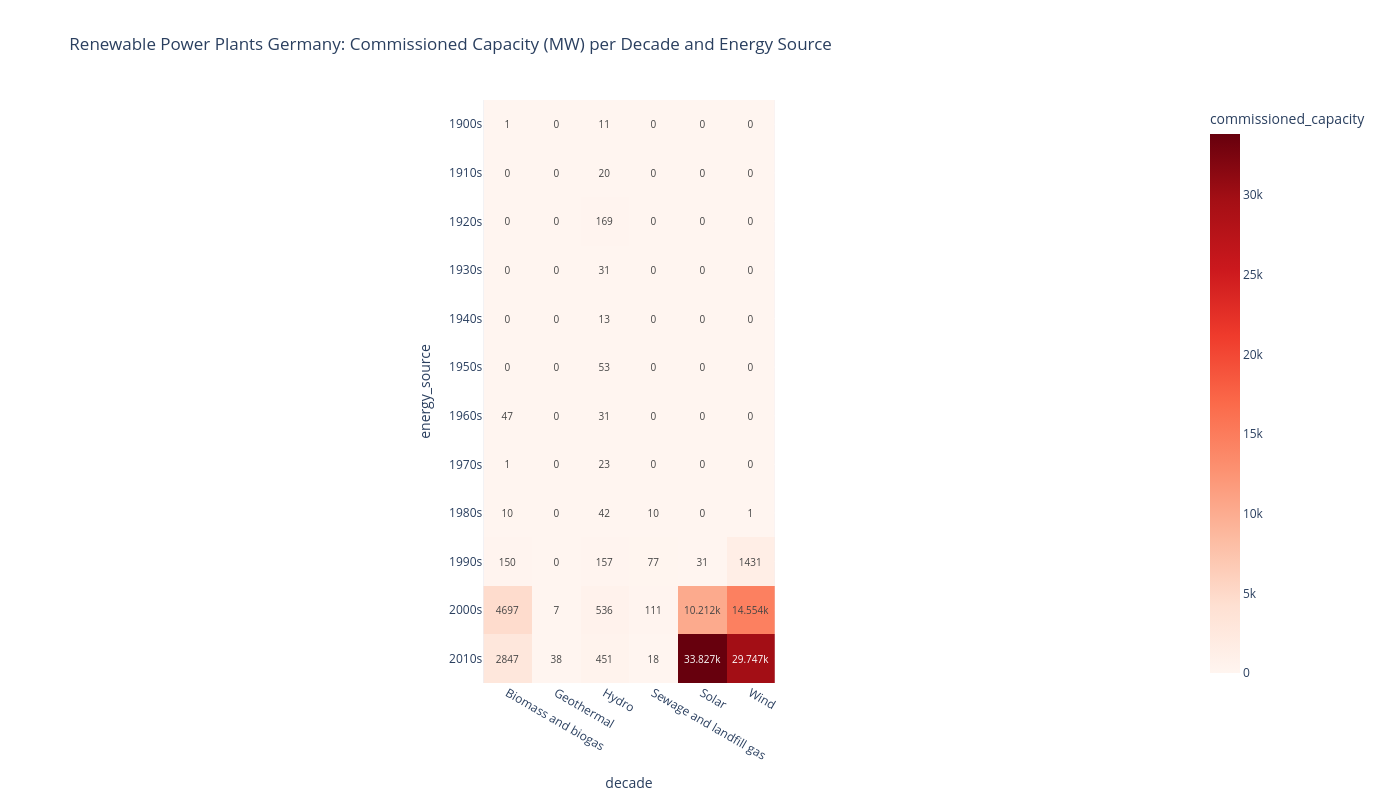

In [75]:
# Create a heatmap displaying the commissioned capacity
#per decade and energy source

fig = px.imshow(
    renew_pivot_comm_cap_source,
    labels=dict(x='decade', y='energy_source', color='commissioned_capacity'),
    color_continuous_scale="Reds",
    title='Renewable Power Plants Germany: Commissioned Capacity (MW) per Decade and Energy Source', 
    text_auto = True
)
fig.update_xaxes(type='category')
fig.update_layout(width=1200, height=800)
fig.show()

# 3.  Data Analysis:  Conventional vs. Renewable Power Plants in Germany

In [76]:
# Create a combined data frame of conv_comm_cap_source and renew_comm_cap_source 
# and round to one decimal place

combined_comm_cap_source = pd.concat([conv_comm_cap_source, renew_comm_cap_source ], ignore_index=True).round(1)
combined_comm_cap_source.columns
combined_comm_cap_source['decade'].info()
# Create additional column 'decade_num' which contains the decades as integers
# (in order to ensure numerical sorting along x-axis)
combined_comm_cap_source['decade_num'] = combined_comm_cap_source['decade'].str.split('s').str[0].astype(int)
combined_comm_cap_source.columns
# Exclude energy sources with the value 'other fuels' to increase clarity
combined_comm_cap_source = combined_comm_cap_source[combined_comm_cap_source['energy_source']!= 'Other fuels']

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: decade
Non-Null Count  Dtype 
--------------  ----- 
92 non-null     object
dtypes: object(1)
memory usage: 868.0+ bytes


In [77]:
# Create a combined dataframe of conv_comm_cap_source and renew_comm_cap_source diregarding
# the different types of energy sources and
# round to one decimal place
# Copy renew_comm_cap_source and set all energy sources to 'Renewable'
renew_comm_cap_source = renew_comm_cap_source.copy()
renew_comm_cap_source['energy_source'] = 'Renewable'

# Copy conv_comm_cap_source and set all energy sources to 'Conventional'
conv_comm_cap_source = conv_comm_cap_source.copy()
conv_comm_cap_source['energy_source'] = 'Conventional'

combined_comm_cap_source2 = pd.concat([renew_comm_cap_source, conv_comm_cap_source], ignore_index=True)
combined_comm_cap_source2.head()
# Create additional column 'decade_num' which contains the decades as integers
# (in order to ensure numerical sorting along x-axis)
combined_comm_cap_source2['decade_num'] = combined_comm_cap_source2['decade'].str.split('s').str[0].astype(int)
combined_comm_cap_source2.columns

Index(['decade', 'energy_source', 'commissioned_capacity', 'decade_num'], dtype='object')

In [78]:
# Create a concatenated dataframe containing the total net capacity of (active)
# power plants by state and energy source (including all sources)
combined_cap_states_sources = pd.concat([conv_cap_states_sources, renew_cap_states_sources])


In [79]:
# Create a concatenated dataframe from dataframes containing the total net capacity of 
# (active) power plants by state and energy source (Conventional vs. Renewable)

# Replace individual energy sources with 'Conventional' 
conv_cap_states_sources['energy_source'] = 'Conventional'
# Group by 'state' and 'energy_source' and calculate total capacity
grouped_conv_cap_states_sources = conv_cap_states_sources.groupby(['state', 'energy_source'], as_index=False).agg(
    {'total_net_capacity': 'sum'})

# Replace individual energy sources with 'Renewable' 
renew_cap_states_sources['energy_source'] = 'Renewable'
# Group by 'state' and 'energy_source' and calculate total capacity
grouped_renew_cap_states_sources =renew_cap_states_sources.groupby(['state', 'energy_source'], as_index=False).agg(
    {'total_net_capacity': 'sum'})

In [80]:
# Concatenate the two dataframes
combined_grouped_cap_states_sources = pd.concat(
    [grouped_conv_cap_states_sources, grouped_renew_cap_states_sources]
)
combined_grouped_cap_states_sources.head()

,state,energy_source,total_net_capacity
0,Baden-Wuerttemberg,Conventional,8620
1,Bavaria,Conventional,9375
2,Berlin,Conventional,1963
3,Brandenburg,Conventional,5719
4,Bremen,Conventional,1586


# 4.  Visualizations:  Conventional vs. Renewable Power Plants in Germany

## Line Chart: Commissioned Capacity (MW) of Power Plants per Decade and Energy Source (Including All Sources)

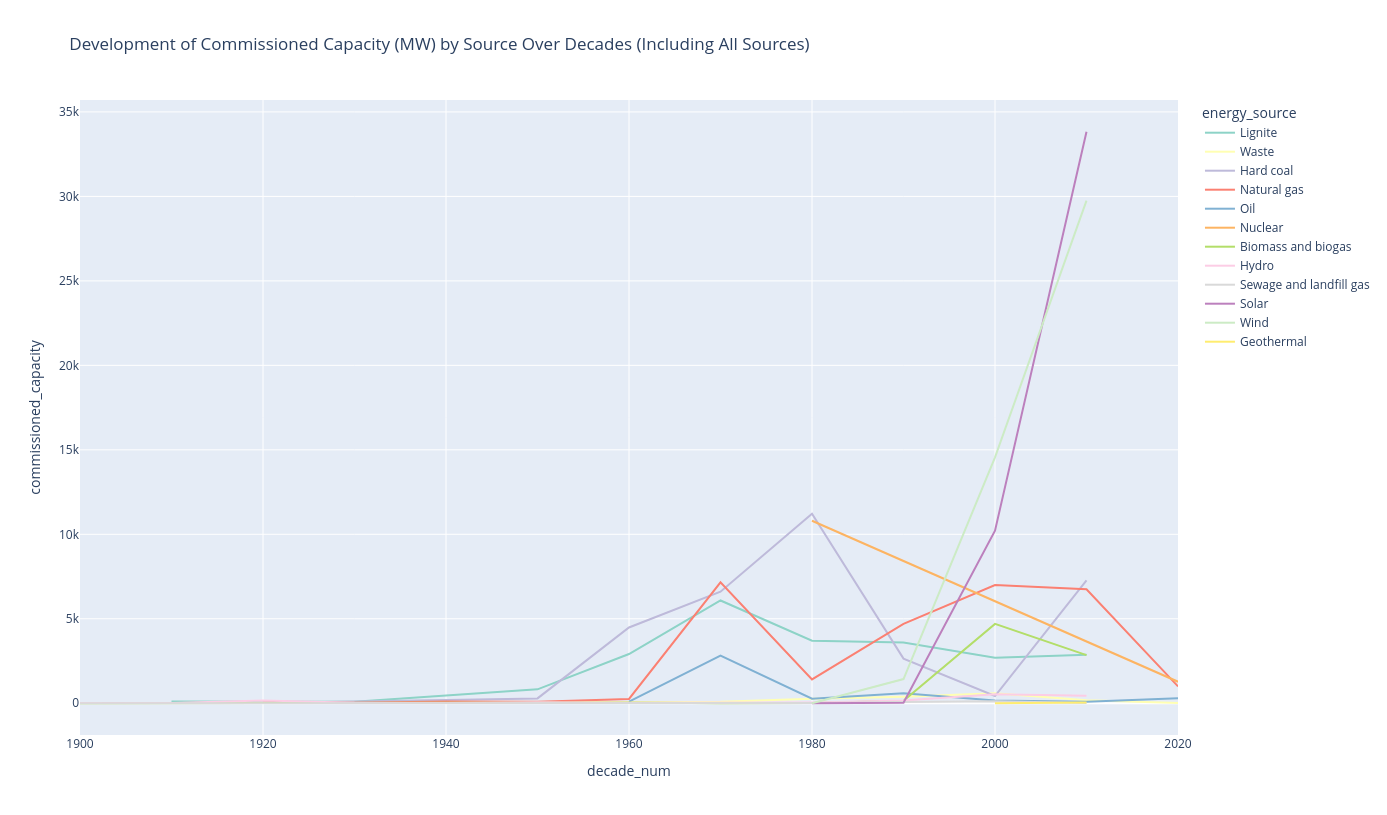

In [81]:
fig = px.line(
    combined_comm_cap_source,
    x='decade_num',
    y='commissioned_capacity',
    color='energy_source',
    color_discrete_sequence=px.colors.qualitative.Set3,
    title='Development of Commissioned Capacity (MW) by Source Over Decades (Including All Sources)'
)    
fig.update_layout(width=1800, height=800)
fig.show()


## Area Chart: Commissioned Capacity (MW) of Power Plants per Decade and Energy Source (Including All Sources)

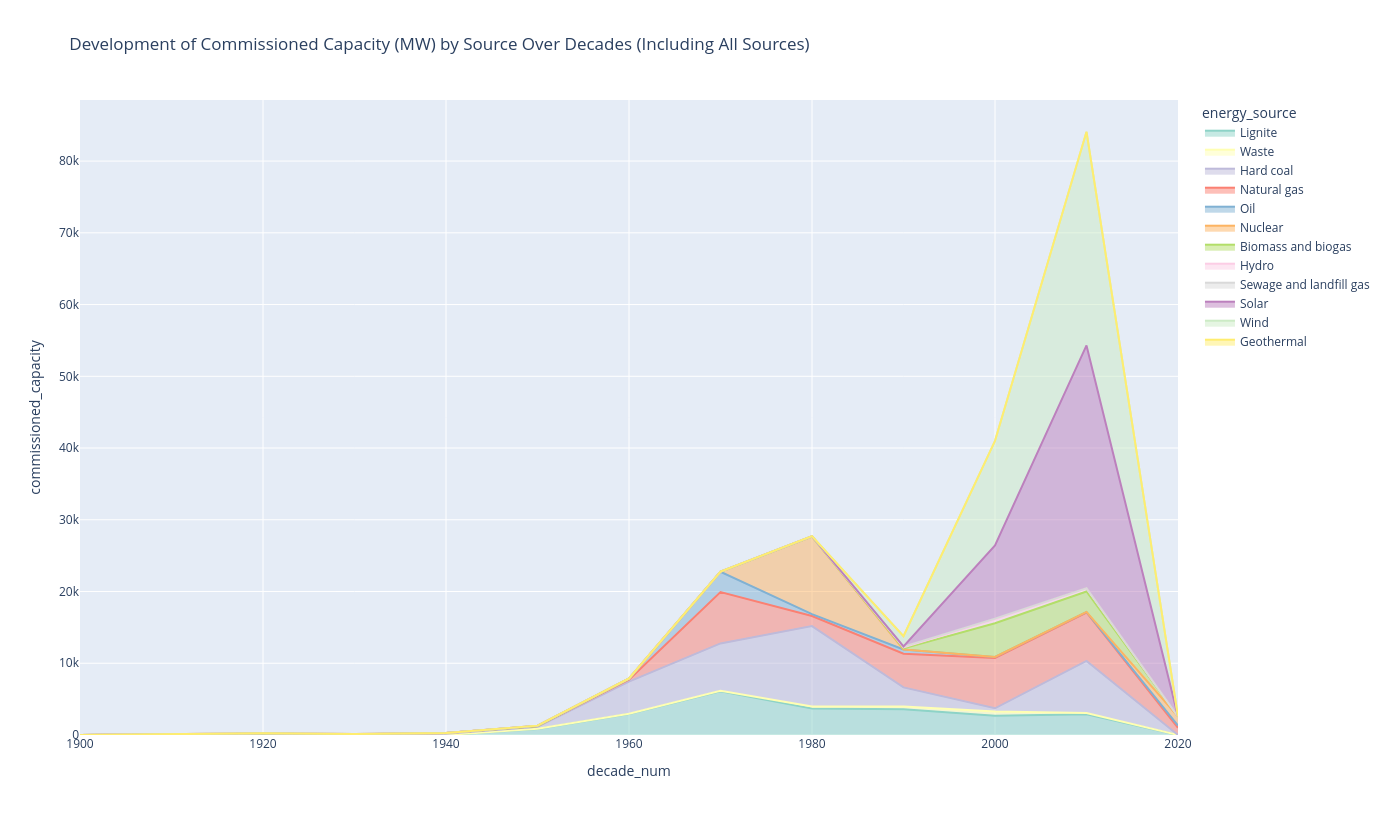

In [82]:
fig = px.area(
    combined_comm_cap_source,
    x='decade_num',
    y='commissioned_capacity',
    color='energy_source',
    color_discrete_sequence=px.colors.qualitative.Set3,
    title='Development of Commissioned Capacity (MW) by Source Over Decades (Including All Sources)'
)
fig.update_layout(width=1800, height=800)
fig.show()

## Stacked Bar Chart: Commissioned Capacity (MW) of Power Plants per Decade and Energy Source (Including All Sources)

## Stacked Bar Chart: Commissioned Capacity (MW) of Power Plants per Decade and Energy Source (Conventional vs. Renewable Sources)

In [83]:
fig = px.bar(combined_comm_cap_source, 
             x='decade_num', 
             y='commissioned_capacity', 
             color='energy_source', 
             color_discrete_sequence=px.colors.qualitative.Set3,
             title='Development of Commissioned Capacity (MW) by Source Over Decades (Including All Sources)',
             barmode='stack')
fig.update_layout(width=1800, height=800)
fig.show()

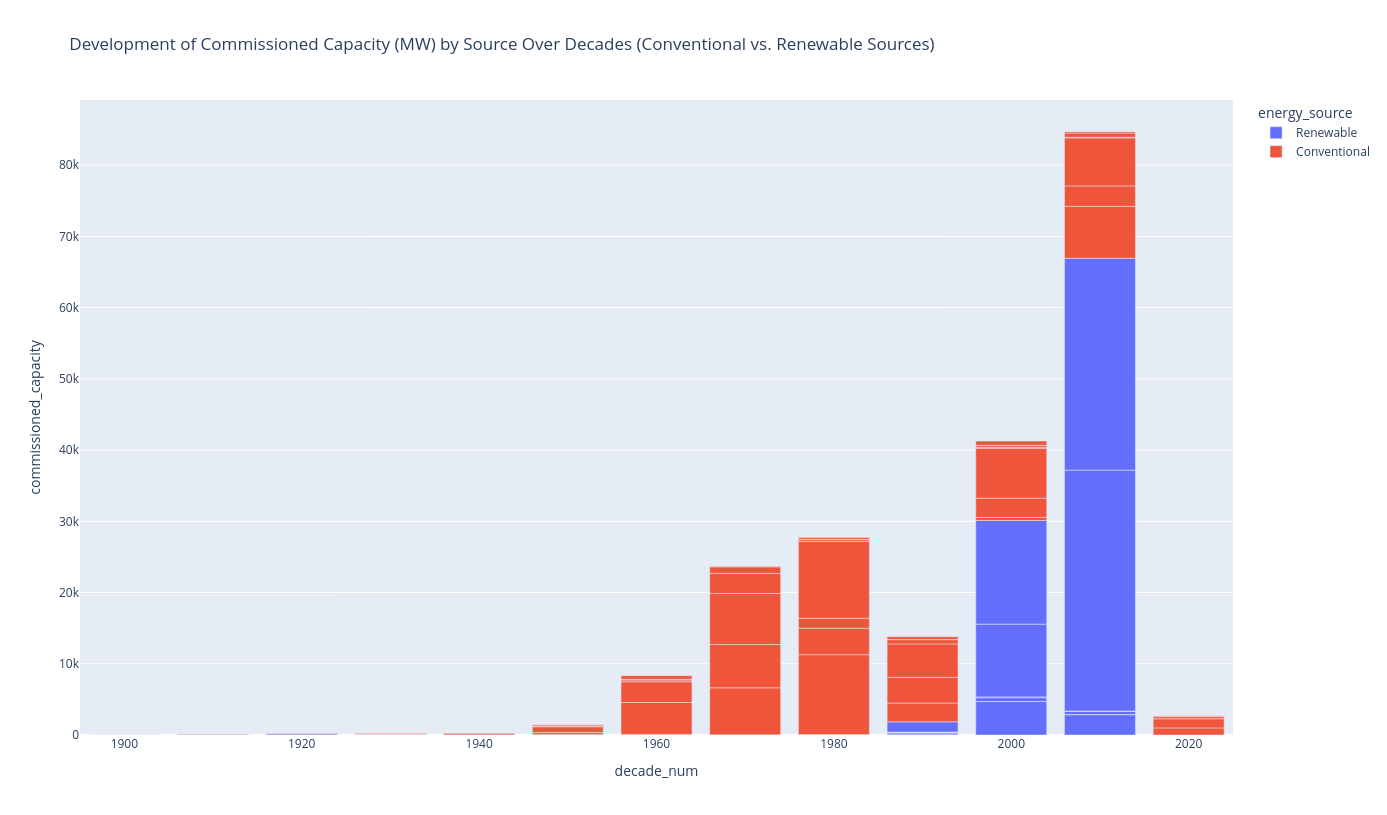

In [84]:
fig = px.bar(
    combined_comm_cap_source2,
    x='decade_num',
    y='commissioned_capacity',
    color='energy_source',
    title='Development of Commissioned Capacity (MW) by Source Over Decades (Conventional vs. Renewable Sources)'
)    
fig.update_layout(width=1800, height=800)
fig.show()

## Sunburst Chart: Commissioned Capacity (MW) by State and Energy Source (Including All Sources)

In [85]:
# Add a root level to the dataframe
combined_cap_states_sources['root'] = 'Germany'

# Create a suburst chart visualizing the commissioned capacity (MW) by State and Energy Source
fig = px.sunburst(
    combined_cap_states_sources,
    path=['root', 'state', 'energy_source'],
    values='total_net_capacity',
    title = 'Commissioned Capacity (MW) by State and Energy Source (Including All Sources)'
)
fig.update_layout(width=1200, height=1200)

fig.show()

## Sunburst Chart: Commissioned Capacity (MW) by State and Energy Source (Including All Sources)

In [86]:
# Add a root level
combined_grouped_cap_states_sources['root'] = 'Germany'

# Define special colours for 'Conventional' and 'Renewable'
color_map = {
    'Conventional': 'orange',
    'Renewable': 'green'
}
# Create the suburst chart
fig = px.sunburst(
    combined_grouped_cap_states_sources,
    path=['root', 'state', 'energy_source'],
    values='total_net_capacity',
    color='energy_source',
    title = 'Commissioned Capacity (MW) by State and Energy Source (Conventional vs. Renewable)'
)
fig.update_layout(width=1200, height=800)

fig.show()

# 5. Export of Relevant Dataframes for Dashboard Creation

## 5.1. Conventional Power

In [87]:
# Export dataframes containing data on amount of conventional power plants
conv_total_plants_state.to_csv('conv_total_plants_state.csv', index=False)
conv_number_plants_states_sources.to_csv('conv_number_plants_states_sources.csv', index=False)

# Export dataframes containing data on capacity of conventional power plants
conv_cap_sources.to_csv('conv_cap_sources.csv', index=False)
conv_avg_cap_source.to_csv('conv_avg_cap_source.csv', index=False)

# Export dataframes containing data on commissionings of conventional power plants
conv_states_comm_source.to_csv('conv_states_comm_source.csv', index=False)
conv_comm_source.to_csv('conv_comm_source.csv', index=False)
conv_comm_cap_source_state.to_csv('conv_comm_cap_source_state.csv', index=False)

# Export dataframes containing data on shutdowns of conventional power plants
conv_shutdown_plants.to_csv('conv_shutdown_plants.csv', index=False)
conv_shutdown_cap.to_csv('conv_shutdown_cap.csv', index=False)

# Export dataframes containing data on amount of conventional power plants
conv_total_plants_state.to_csv('conv_total_plants_state.csv', index=False)
conv_number_plants_states_sources.to_csv('conv_number_plants_states_sources.csv', index=False)

## 5.1. Renewable Power

In [88]:
# Export dataframes containing data on capacity of renewable power plants
renew_cap_sources.to_csv('renew_cap_sources.csv', index=False)
renew_avg_cap_source.to_csv('renew_avg_cap_source.csv', index=False)

# Export of dataframes containing data on commissionings of renewable power plants
renew_states_comm_source.to_csv('renew_states_comm_source.csv', index=False)
renew_comm_source.to_csv('renew_comm_source.csv', index=False)
renew_comm_cap_source_state.to_csv('renew_comm_cap_source_state.csv', index=False)